# Game Winner Prediction

## Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.
### Task 2:-Create a predictive model which is an attempt to predict the win probabilityof the Pubg match and to look at the important factors affecting the win probability of the pubg game.

In [1]:

# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#importing libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#importing libraries for ML analysis
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

# importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#importing libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dataset as a dataframe
data=pd.read_csv('Data\pubg.csv')

In [3]:
# displaying a sample of the dataframe
data.sample(5)

Id         groupId         matchId  assists  boosts  \
2333963  c7ff8f87e9d2fe  b28cf4664a6e67  a0f4258621195f        1       5   
2163639  fe5933597be869  c1b4dc7505d1fb  653a7130fbe15f        1       0   
1808095  142baec44b26cb  6c347dfdb2e618  20448459cdc3a9        0       0   
1103366  443ca497f70744  77abe1c885c778  e19210730c7ed7        0       4   
2906662  2a2ef49da8d148  b6a01f5ed6ea1e  5844b0b981f3d2        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2333963        418.1      0              1      3          7           0   
2163639        130.1      1              0      0         31           0   
1808095        125.4      0              1      1         33        1411   
1103366          0.0      0              0      6         46           0   
2906662        452.7      3              2      1          7           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
2333963      3            1      216.000           1853   solo-fpp        97   
2163639      1            1        7.827           1295  squad-fpp        30   
1808095      1            1       20.670           1408   solo-fpp        98   
1103366      0            0        0.000           1389  squad-fpp        28   
2906662      4            2      221.000           1371  squad-fpp        30   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
2333963         94        1484        0       11960.0          1   
2163639         27        1456        1           0.0          0   
1808095         92          -1        0           0.0          0   
1103366         27        1431        1         506.0          0   
2906662         30        1517        1           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
2333963           0.0          0                0       1049.00   
2163639           0.0          0                0         71.87   
1808095           0.0          0                0        161.00   
1103366           0.0          0                0       1225.00   
2906662           0.0          0                0        920.20   

         weaponsAcquired  winPoints  winPlacePerc  
2333963                8          0        0.7812  
2163639                1          0        0.5172  
1808095                2       1476        0.3093  
1103366                5          0        0.8148  
2906662                1          0        0.5172

## Dataset Description

The dataset consists of various features related to player performance and game statistics in PlayerUnknown's Battlegrounds (PUBG), a popular online multiplayer battle royale game. The goal of this report is to analyze the dataset and develop machine learning models for predicting player performance, specifically focusing on the "winPlacePerc" feature, which represents the percentile winning placement of a player in a match.

#### Features:

* groupId: Integer ID assigned to identify a group of players within a match. Each group may have a different ID for each match.

* matchId: Integer ID assigned to identify a specific match. No matches are present in both the training and testing sets.

* assists: Number of enemy players damaged by the player that were subsequently killed by teammates.

* boosts: Number of boost items used by the player.

* damageDealt: Total damage dealt by the player. Self-inflicted damage is subtracted from this total.

* DBNOs: Number of enemy players knocked down by the player.

* headshotKills: Number of enemy players killed by the player with headshots.

* heals: Number of healing items used by the player.

* killPlace: Ranking of the player in terms of the number of enemy players killed within the match.

* killPoints: Kills-based external ranking of the player, similar to an Elo ranking system where only kills contribute.

* kills: Number of enemy players killed by the player.

* killStreaks: Maximum number of enemy players killed by the player in a short duration.

* longestKill: Longest distance between the player and a killed enemy player at the time of death. Note that this metric may be skewed, as it includes scenarios where a player downs an opponent and then drives away.

* maxPlace: Worst placement recorded in the match based on available data.

* numGroups: Number of distinct groups present in the match for which data is available.

* revives: Number of times the player revived teammates.

* rideDistance: Total distance traveled by the player in vehicles, measured in meters.

* roadKills: Number of kills achieved by the player while in a vehicle.

* swimDistance: Total distance traveled by the player through swimming, measured in meters.

* teamKills: Number of times the player killed a teammate.

* vehicleDestroys: Number of vehicles destroyed by the player.

* walkDistance: Total distance traveled by the player on foot, measured in meters.

* weaponsAcquired: Number of weapons picked up by the player.

* winPoints: Win-based external ranking of the player, similar to an Elo ranking system where only winning matters.

* winPlacePerc: The target variable for prediction, representing the percentile winning placement of the player in the match, where 1 corresponds to 1st place and 0 corresponds to last place.

In [4]:
# displaying shape of the dataset
data.shape

(4446966, 29)

In [5]:
# displaying statistical information about the dataset
data.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  4.446966e+06   4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   2.299759e+01   1.579506e+03  4.450467e+01  4.300759e+01  8.920105e+02   
std    5.097262e+01   2.587399e+02  2.382811e+01  2.328949e+01  7.366478e+02   
min    0.000000e+00   9.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.132000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.094000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.910000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.646590e-01  6.061157e+02  3.496091e-03  4.509322e+00  2.386841e-02   
std    4.721671e-01  1.498344e+03  7.337297e-02  3.050220e+01  1.673935e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03  1.200000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     4.446966e+06  4.446966e+06     4.446966e+06  4.446966e+06   
mean      7.918208e-03  1.154218e+03     3.660488e+00  6.064601e+02   
std       9.261157e-02  1.183497e+03     2.456544e+00  7.397004e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.551000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.856000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.976000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.013000e+03   

       winPlacePerc  
count  4.446965e+06  
mean   4.728216e-01  
std    3.074050e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

In [6]:
# displaying statistical information about non numerical columns
data.describe(include = 'object')

Id         groupId         matchId  matchType
count          4446966         4446966         4446966    4446966
unique         4446966         2026745           47965         16
top     7f96b2f878858a  14d6b54cdec6bc  4b5db40aec4797  squad-fpp
freq                 1              74             100    1756186

In [7]:
# displaying more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

We can see that the memory usage is 983.9+ MB. It can be reduced by downgrading datatypes.

In [8]:
# changing datatypes

data['assists']=pd.to_numeric(data.assists,downcast='integer')
data["boosts"] = pd.to_numeric(data.boosts, downcast="integer")
data['DBNOs']=pd.to_numeric(data.DBNOs,downcast='integer')
data['headshotKills']=pd.to_numeric(data.headshotKills,downcast='integer')
data['heals']=pd.to_numeric(data.heals,downcast='integer')
data['killPlace']=pd.to_numeric(data.killPlace,downcast='integer')
data['killPoints']=pd.to_numeric(data.killPoints,downcast='integer')
data['kills']=pd.to_numeric(data. kills,downcast='integer')
data['killStreaks']=pd.to_numeric(data.killStreaks,downcast='integer')
data['matchDuration']=pd.to_numeric(data.matchDuration,downcast='integer')
data['maxPlace']=pd.to_numeric(data.maxPlace,downcast='integer')
data['numGroups']=pd.to_numeric(data.numGroups,downcast='integer')
data['rankPoints']=pd.to_numeric(data.rankPoints,downcast='integer')
data['revives']=pd.to_numeric(data.revives,downcast='integer')
data['roadKills']=pd.to_numeric(data.roadKills,downcast='integer')
data['teamKills']=pd.to_numeric(data.teamKills,downcast='integer')
data['vehicleDestroys']=pd.to_numeric(data.vehicleDestroys,downcast='integer')
data['weaponsAcquired']=pd.to_numeric(data.weaponsAcquired,downcast='integer')
data['winPoints']=pd.to_numeric(data.winPoints,downcast='integer')

data.damageDealt = data.damageDealt.astype("float32")
data.longestKill =data.longestKill.astype('float32')
data.rideDistance =data.rideDistance.astype('float32')
data.swimDistance =data.swimDistance.astype('float32')
data.walkDistance =data.walkDistance.astype('float32')


In [9]:
# checking memory usage again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

The memory usage has reduced by more than 50%, improving processing times with minimal data quality loss.

In [10]:
# checking for null values
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

There is only one null value in the dataset, which can be dropped without any data quality loss.

In [11]:
data.dropna(inplace=True)

In [12]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicated values in the dataset, thus no processing is required.

## EDA

#### Kill counts

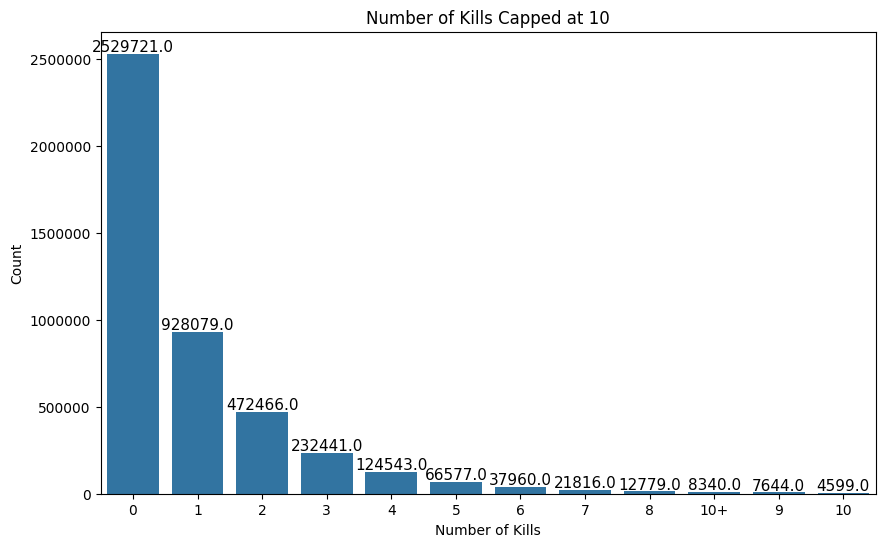

In [13]:
# Map the values to '10+' if greater than 10
data['kills_capped'] = data['kills'].apply(lambda x: '10+' if x > 10 else str(x))

# Plot the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=data['kills_capped'], order=data['kills_capped'].value_counts().index)
plt.title('Number of Kills Capped at 10')
plt.xlabel('Number of Kills')
plt.ylabel('Count')

# Formatting Y-axis labels to regular denomination
plt.ticklabel_format(style='plain', axis='y')

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [14]:
# dropping the newly created feature 'kills_capped'
data.drop(columns=['kills_capped'],inplace=True)

In [15]:
# plotting the value counts of unique values in each column in the dataset
for i in data.columns:
    if i not in ['Id','groupId','matchId']:
        print(i)
        print('numbe of unique values',data[i].nunique())
        print(data[i].value_counts())
        print('-----------')
    

assists
numbe of unique values 20
assists
0     3667659
1      591883
2      137144
3       35640
4        9990
5        2892
6         976
7         387
8         185
9          84
10         48
11         27
12         20
13         16
15          7
14          2
17          2
21          1
20          1
22          1
Name: count, dtype: int64
-----------
boosts
numbe of unique values 27
boosts
0     2521323
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
Name: count, dtype: int64
-----------
damageDealt
numbe of unique values 29916
damageDealt
0.000000       1238101
100.000000      262781
200.000000       62398
300.000000       13767
75.000000        12825
23.219999       

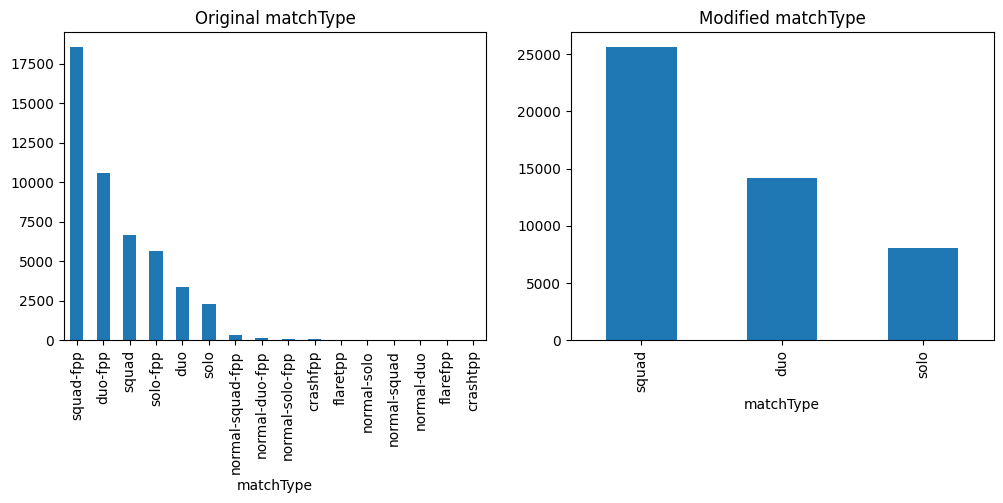

In [16]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
data.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])
#subtype=lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo in x') or ('crash' in x) else 'squad'
ax[0].set_title("Original matchType")

# Define the subtype function
def subtype(x):
    if 'solo' in x:
        return 'solo'
    elif 'duo' in x or 'crash' in x:
        return 'duo'
    else:
        return 'squad'

data['matchType']=data['matchType'].apply(subtype)
data.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])
ax[1].set_title("Modified matchType")

plt.show()


### Insights
* Majority of the matches in the dataset are 'squad'.
* Majority of squad matches are 'squad-fpp'.
* Majority of duo matches are 'duo-fpp'.
* Majority of solo matches are 'solo-fpp'.

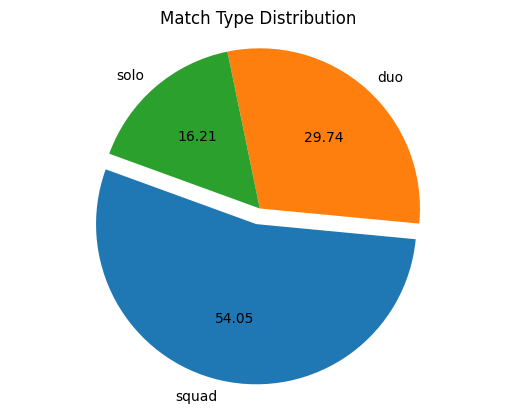

In [17]:
# plotting distribution of matchtypes
match_type_counts = data['matchType'].value_counts()
explode=[0.1,0,0]

# Create a pie chart
#plt.pie(match_type_counts,labels=match_type_counts.index, autopct='%1.1f%%', startangle=160)

plt.pie(match_type_counts,labels=match_type_counts.index, autopct='%.2f', startangle=160,explode=explode)


# Optionally, add a title
plt.title('Match Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Insights
* More than half of the matches (54.05%) are 'squad'.
* More than a quarter of the matches (29.74%) are 'duo'.

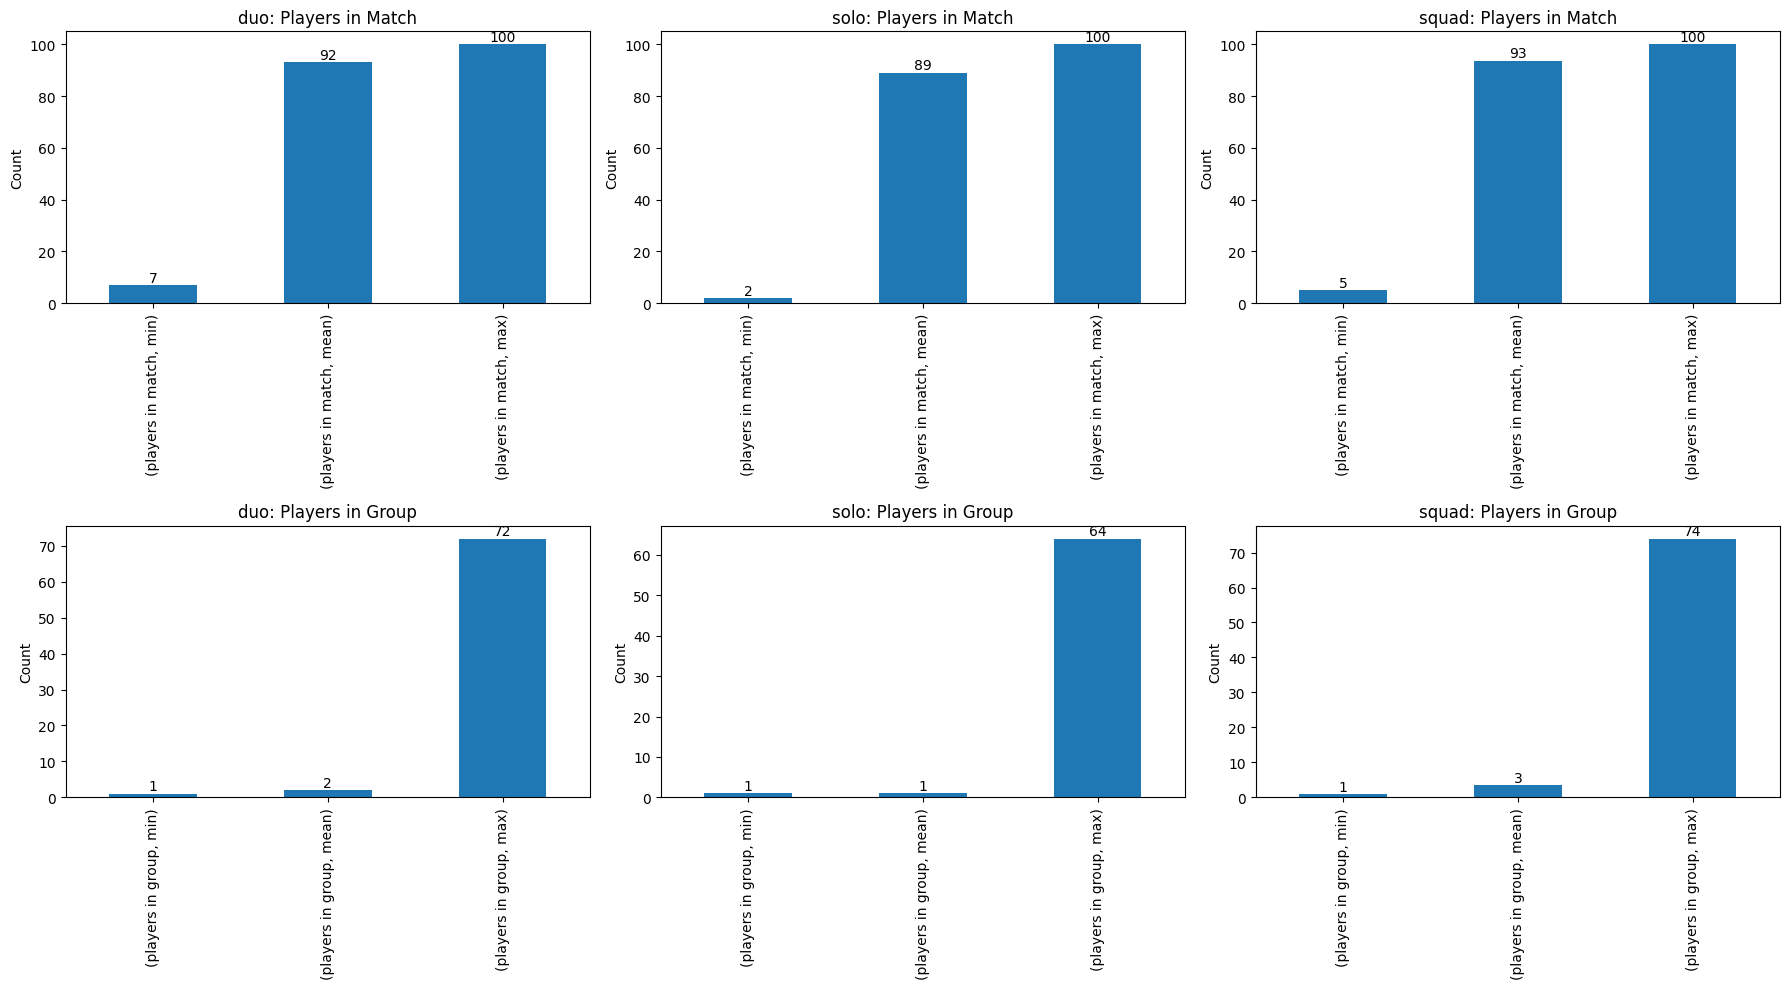

In [18]:
def mergelist(list1, list2):
    return list(itertools.product(list1, list2))

match = data.groupby(['matchType', 'matchId']).size().to_frame('players in match')
group = data.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in group')

descriptive_stats = pd.concat([
    match.groupby('matchType').describe()[mergelist(['players in match'], ['min', 'mean', 'max'])],
    group.groupby("matchType").describe()[mergelist(['players in group'], ['min', 'mean', 'max'])]
], axis=1)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, match_type in enumerate(descriptive_stats.index):
    # Plot players in match
    match_stats = descriptive_stats.loc[match_type, ('players in match', ['min', 'mean', 'max'])]
    match_stats.plot(kind='bar', ax=axes[0, i])
    axes[0, i].set_title(f"{match_type}: Players in Match")
    axes[0, i].set_ylabel("Count")
    
    # Add data labels for players in match
    for index, value in enumerate(match_stats):
        axes[0, i].text(index, value + 0.1, str(int(value)), ha='center', va='bottom')
    
    # Plot players in group
    group_stats = descriptive_stats.loc[match_type, ('players in group', ['min', 'mean', 'max'])]
    group_stats.plot(kind='bar', ax=axes[1, i])
    axes[1, i].set_title(f"{match_type}: Players in Group")
    axes[1, i].set_ylabel("Count")
    
    # Add data labels for players in group
    for index, value in enumerate(group_stats):
        axes[1, i].text(index, value + 0.1, str(int(value)), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

### Insights
* Minimum number of players in a solo match is 1, average is 89.03, maximum is 100.
* Minimum number of players in a duo match is 7, average is 92.99, maximum is 100.
* Minimum number of players in a squad match is 5, average is 93.72, maximum is 100.
* Minimum number of players in solo group with solo matches is 1, average number of solo players in a solo group is 1.04, maximum is 64.
* Minimum number of players in a duo group in duo matches is 1, average number of duo players in a group in duo match is 2.05, maximum is 72.
* Minimum number of players in a squad group in squad match is 1, average number of players in a squad group in a squad match is 3.49, maximum number is 74.

<Axes: xlabel='walkDistance', ylabel='Count'>

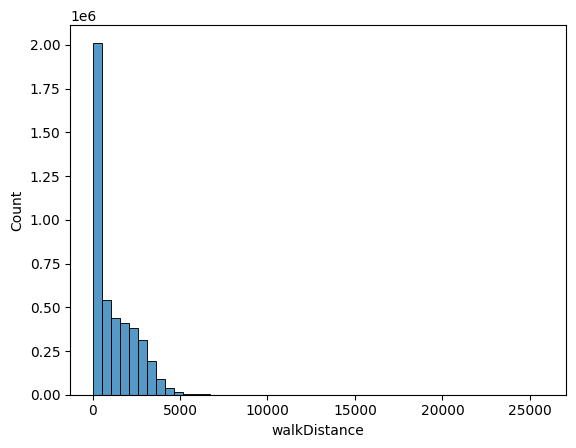

In [19]:
# walking distance distribution
sns.histplot(x=data['walkDistance'],bins=50)

In [20]:
print("No. of records with 0 walk distance: ",(data['walkDistance']==0).value_counts()[1])
print("Percenatge of records with 0 walk distance: ",((data['walkDistance']==0).value_counts()[1])*100/len(data))

No. of records with 0 walk distance:  99602
Percenatge of records with 0 walk distance:  2.2397747677348483


<Axes: xlabel='rideDistance', ylabel='Count'>

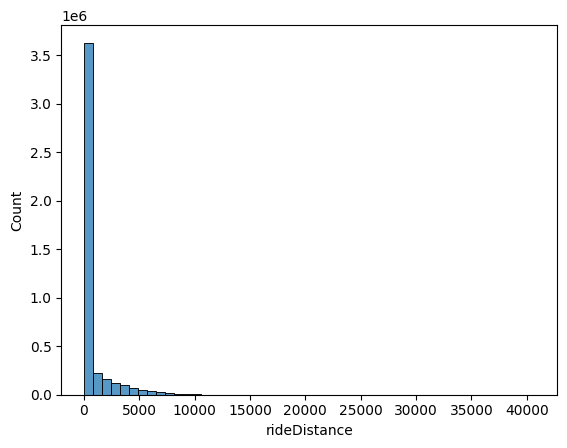

In [21]:
# driving distance distribution
sns.histplot(x=data['rideDistance'],bins=50)

In [22]:
print("No. of records with 0 walk distance: ",(data['rideDistance']==0).value_counts()[1])
print("Percenatge of records with 0 walk distance: ",((data['rideDistance']==0).value_counts()[1])*100/len(data))

No. of records with 0 walk distance:  1137537
Percenatge of records with 0 walk distance:  25.580075399738924


### Insights
* 2.235% of players died even before taking a step.
* 74.41% players didn't drive (0 drive distance).


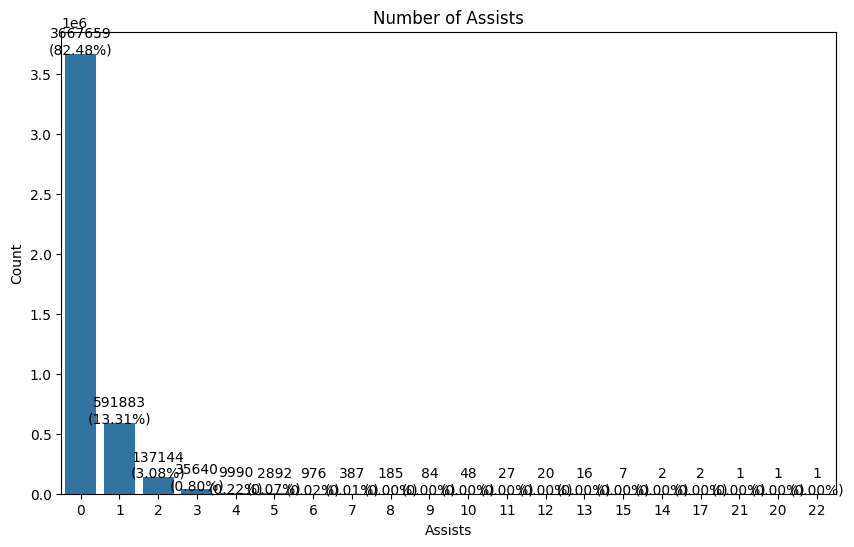

In [23]:
# Plotting assists by each player
# Count the occurrences of each assist
assist_counts = data['assists'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['assists'], order=assist_counts.index)

# Adding data labels with counts and percentages
total_assists = assist_counts.sum()
for i, count in enumerate(assist_counts):
    percent = (count / total_assists) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Assists')
plt.ylabel('Count')
plt.title('Number of Assists')
plt.show()

### Insights
82% of players did not have any assisted kills.

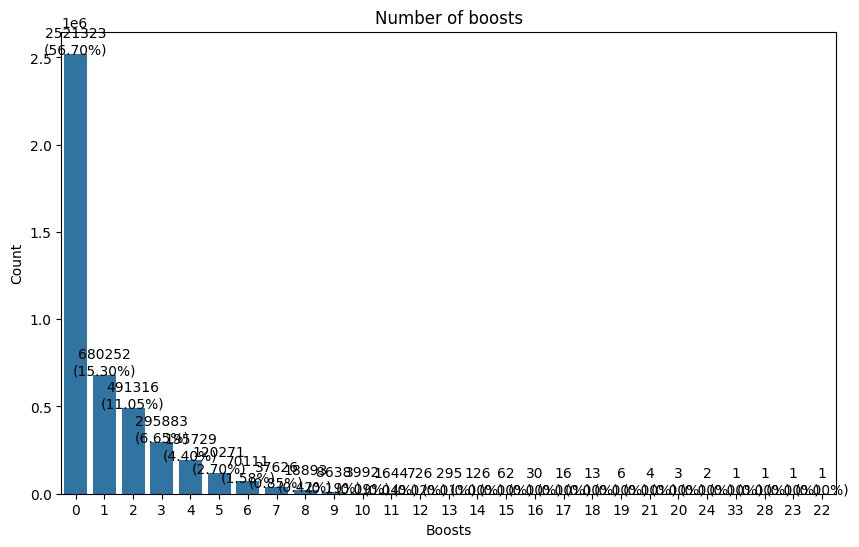

In [24]:
# plotting boosts used by players
# Count the occurrences of each boost
boost_counts = data['boosts'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['boosts'], order=boost_counts.index)

# Adding data labels with counts and percentages
total_boosts = boost_counts.sum()
for i, count in enumerate(boost_counts):
    percent = (count / total_boosts) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Boosts')
plt.ylabel('Count')
plt.title('Number of boosts')
plt.show()

### Insights
More than 56% of players did not use any boost items

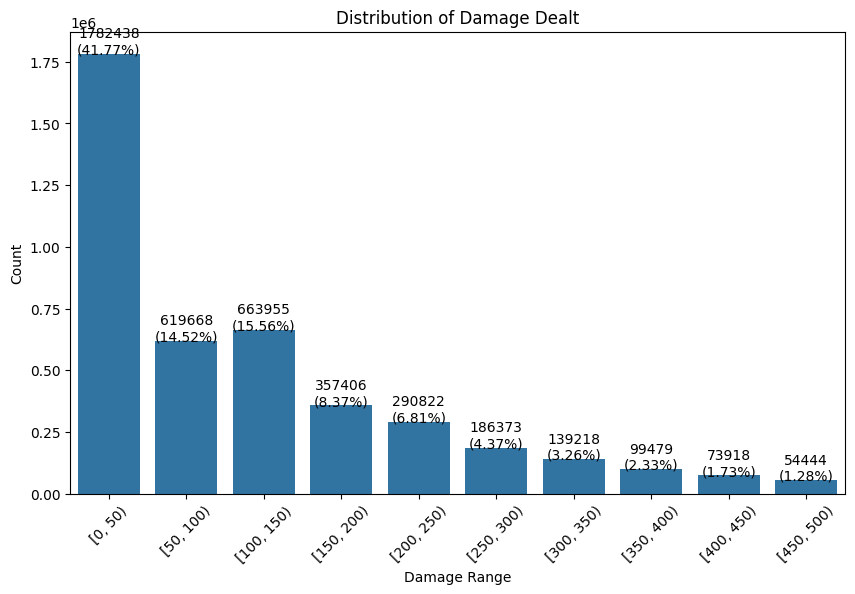

In [25]:
#plotting damage dealt by each player

# Define the ranges for damage dealt
damage_ranges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create a new column 'damage_range' to categorize damage into ranges
data['damage_range'] = pd.cut(data['damageDealt'], bins=damage_ranges, right=False)

# Count the occurrences of damage in each range
damage_counts = data['damage_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['damage_range'], order=damage_counts.index)

# Adding data labels with counts and percentages
total_damage = damage_counts.sum()
for i, count in enumerate(damage_counts):
    percent = (count / total_damage) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Damage Range')
plt.ylabel('Count')
plt.title('Distribution of Damage Dealt')
plt.xticks(rotation=45)
plt.show()


In [26]:
# dropping the newly created feature - 'damage_range'
data.drop(columns=['damage_range'],inplace=True)

### Insight
More than 40% of the players dealt very low damage (between 0-50 points), and only 1.28% of players dealt high damage (between 450-500 points).

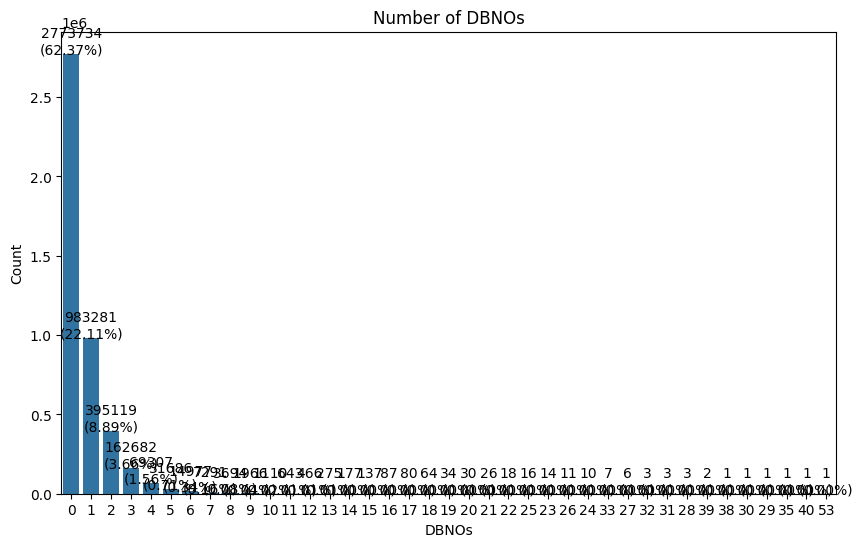

In [27]:
# plotting the count of players knocked down by each player

# Count the occurrences of each DBNO
DBNO_counts = data['DBNOs'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['DBNOs'], order=DBNO_counts.index)

# Adding data labels with counts and percentages
total_DBNOs = DBNO_counts.sum()
for i, count in enumerate(DBNO_counts):
    percent = (count / total_assists) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('DBNOs')
plt.ylabel('Count')
plt.title('Number of DBNOs')
plt.show()

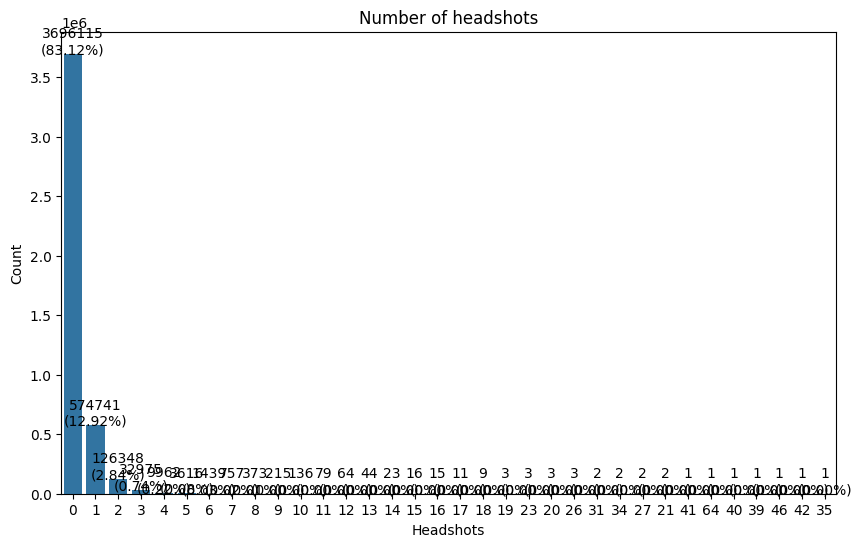

In [28]:
# plotting number of headshot kills by players

# Count the occurrences of headshots
hs_counts = data['headshotKills'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['headshotKills'], order=hs_counts.index)

# Adding data labels with counts and percentages
total_hs = hs_counts.sum()
for i, count in enumerate(hs_counts):
    percent = (count / total_hs) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Headshots')
plt.ylabel('Count')
plt.title('Number of headshots')
plt.show()

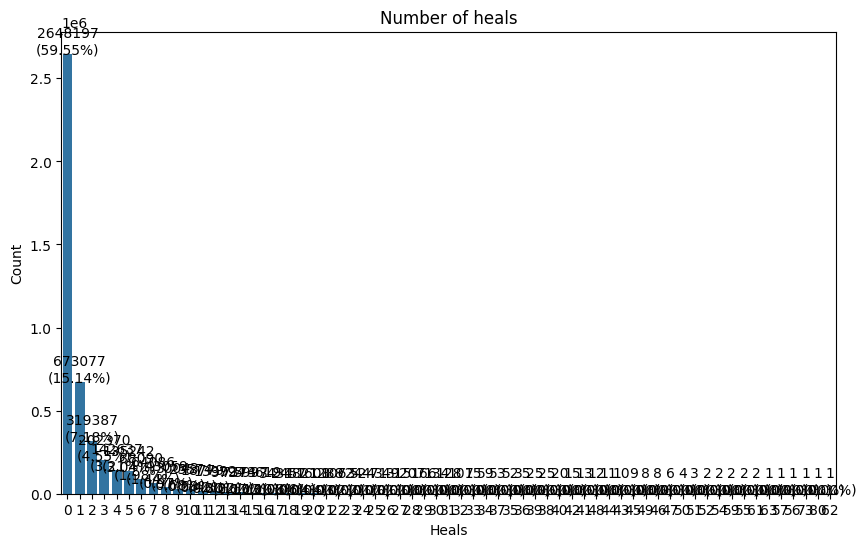

In [29]:
# plotting number of healing items used by each player

# Count the occurrences healing items used
heal_counts = data['heals'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['heals'], order=heal_counts.index)

# Adding data labels with counts and percentages
total_heals = heal_counts.sum()
for i, count in enumerate(heal_counts):
    percent = (count / total_heals) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Heals')
plt.ylabel('Count')
plt.title('Number of heals')
plt.show()

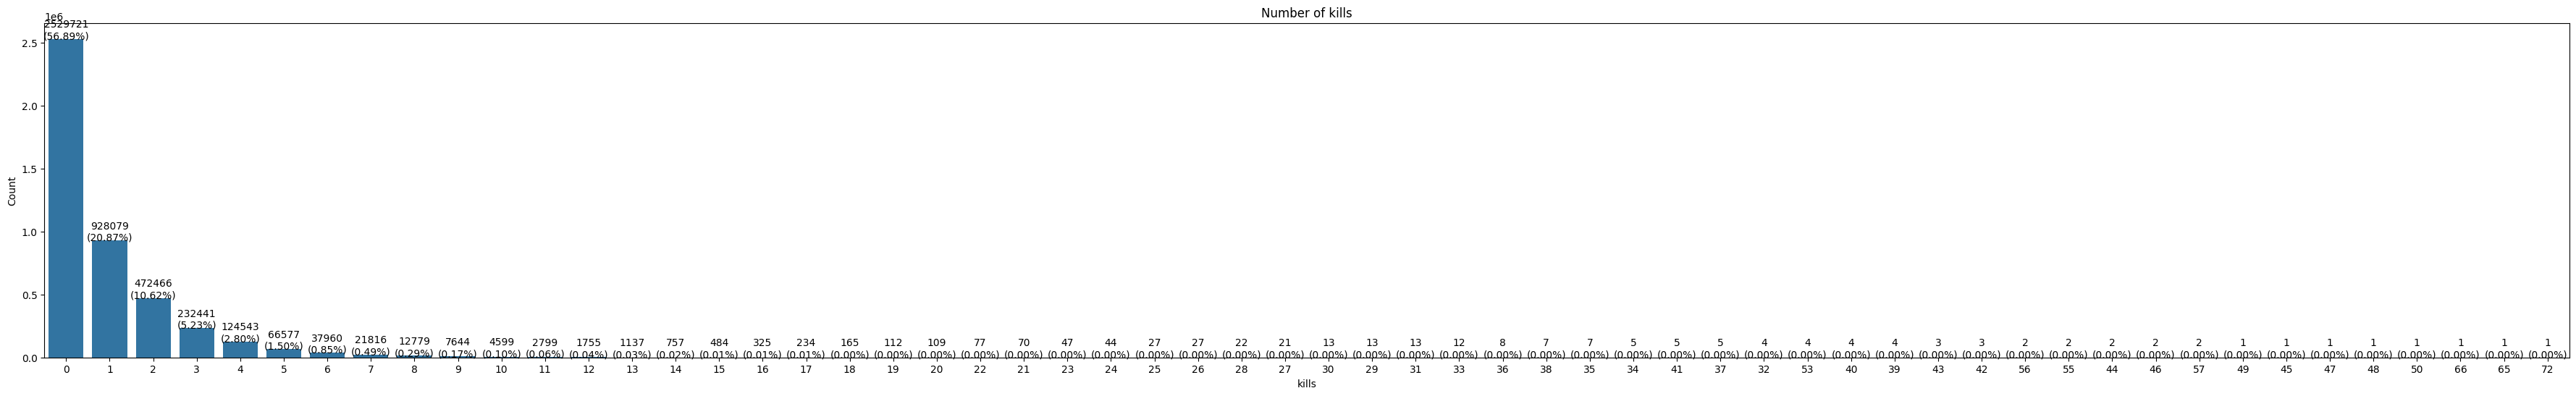

In [30]:
# plotting number of kills by each player

# Count the occurrences kills
kill_counts = data['kills'].value_counts()

# Plotting
plt.figure(figsize=(45, 6))
sns.countplot(x=data['kills'], order=kill_counts.index)

# Adding data labels with counts and percentages
total_kills = kill_counts.sum()
for i, count in enumerate(kill_counts):
    percent = (count / total_kills) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('kills')
plt.ylabel('Count')
plt.title('Number of kills')
plt.show()

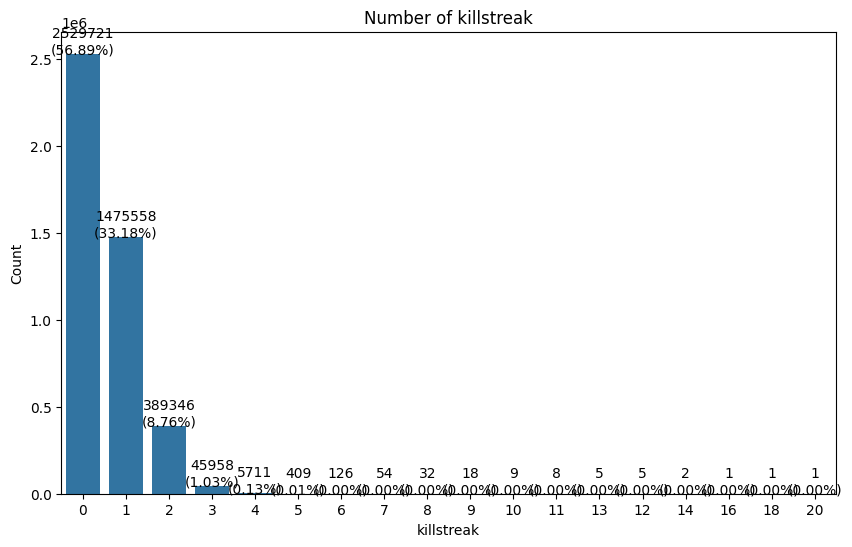

In [31]:
# plotting killstreaks

# Count the occurrences of each killstreak
ks_counts = data['killStreaks'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=data['killStreaks'], order=ks_counts.index)

# Adding data labels with counts and percentages
total_kss = ks_counts.sum()
for i, count in enumerate(ks_counts):
    percent = (count / total_kss) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('killstreak')
plt.ylabel('Count')
plt.title('Number of killstreak')
plt.show()

### Insight
More than 56% players did not have a kill streak, with only ~9.9% having a streak more than 1.

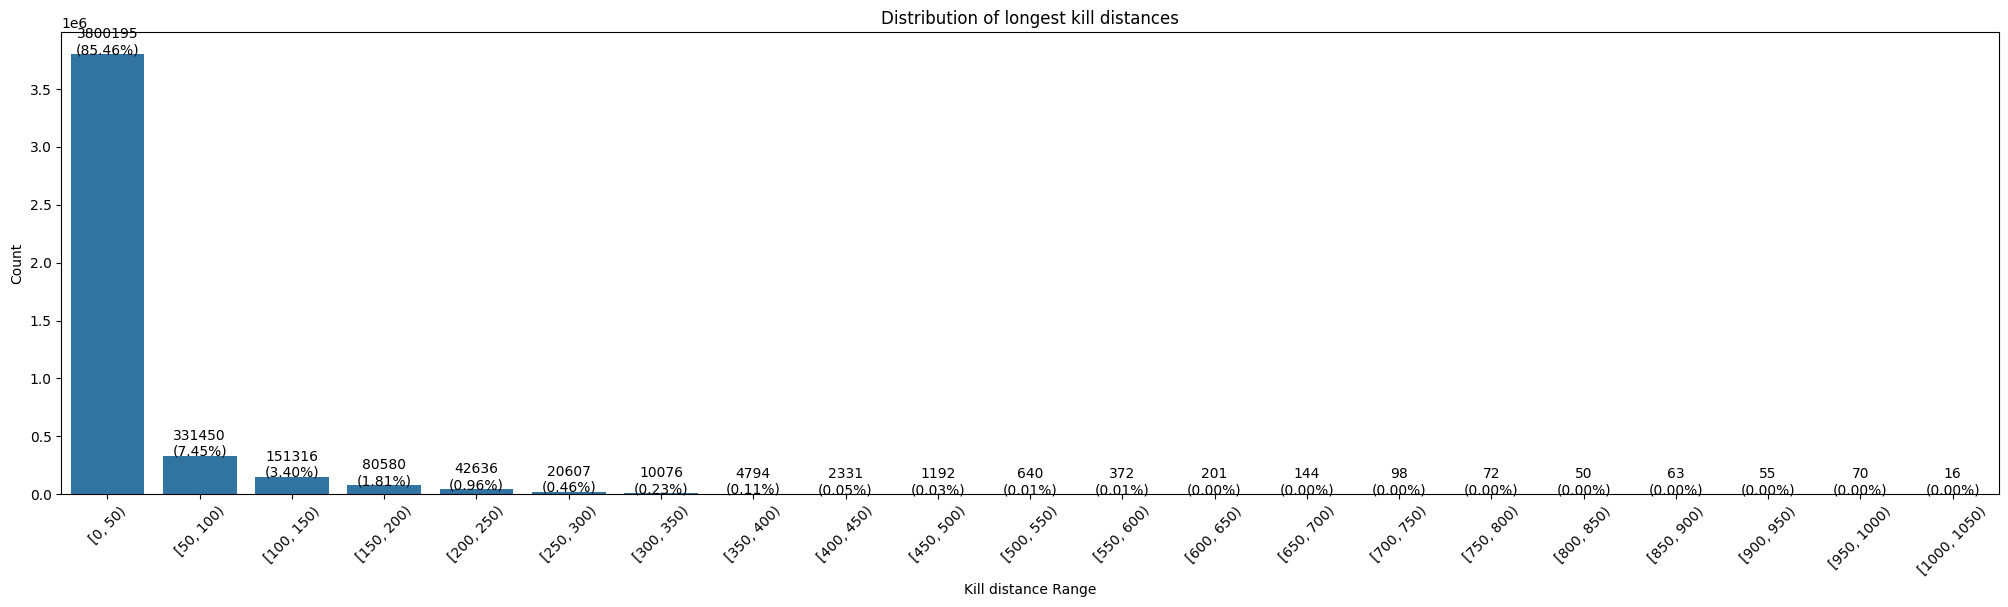

In [32]:
#plotting longest kills by players

# Define the ranges for longest kill distances dealt
kill_ranges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500,550,600,650,700,750,800,850,900,950,1000,1050]

# Create a new column 'killdistance_range' to categorize damage into ranges
data['killdistance_range'] = pd.cut(data['longestKill'], bins=kill_ranges, right=False)

# Count the occurrences of longest kills for each player in each range
kill_counts = data['killdistance_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(25, 6))
sns.countplot(x=data['killdistance_range'], order=kill_counts.index)

# Adding data labels with counts and percentages
total_kills = kill_counts.sum()
for i, count in enumerate(kill_counts):
    percent = (count / total_kills) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Kill distance Range')
plt.ylabel('Count')
plt.title('Distribution of longest kill distances')
plt.xticks(rotation=45)
plt.show()


### Insight
98.12% of players had a very small longest kill distance (between 0 to 200m) with 85.46% players had less than 50m longest kill distance

In [33]:
# dropping the newly created feature - 'killdistance_range'
data.drop(columns=['killdistance_range'],inplace=True)

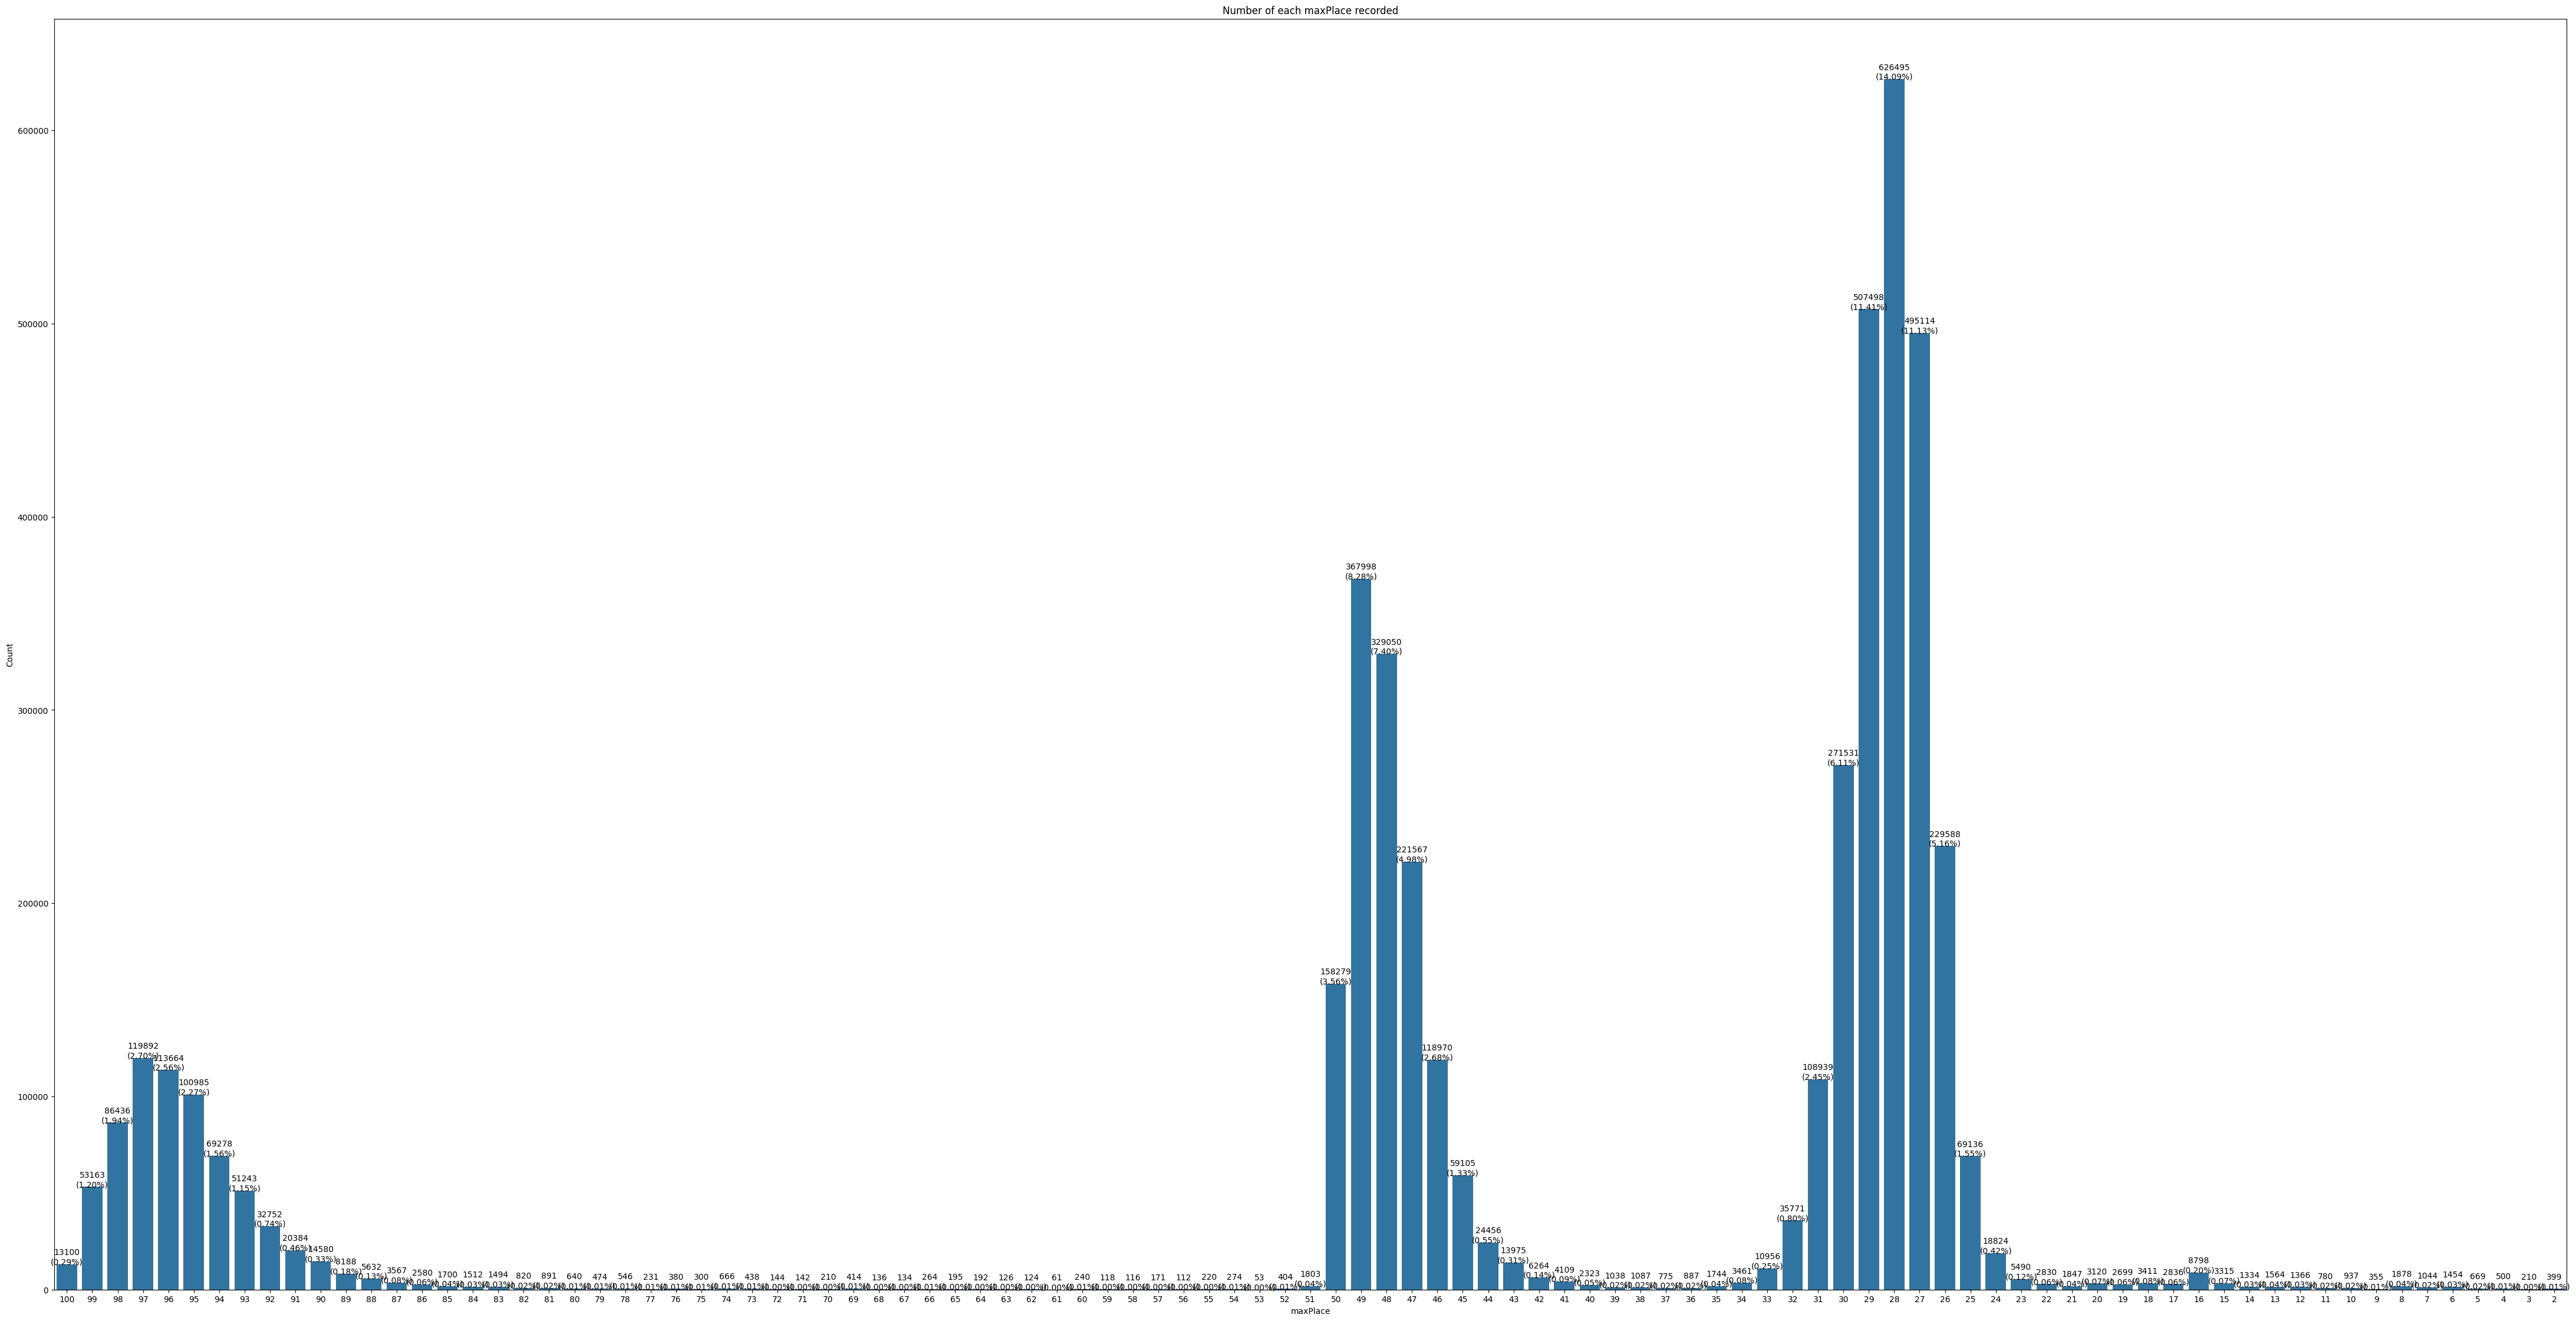

In [34]:
# Count the occurrences of worst placement positions recorded.
mp_counts = data['maxPlace'].value_counts().sort_index(ascending=False)

# Plotting
plt.figure(figsize=(55, 28))
sns.countplot(x=data['maxPlace'], order=mp_counts.index)

# Adding data labels with counts and percentages
total_mps = mp_counts.sum()
for i, count in enumerate(mp_counts):
    percent = (count / total_mps) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('maxPlace')
plt.ylabel('Count')
plt.title('Number of each maxPlace recorded')
plt.show()


### Insights
1. 15.2% players had worst match placement between 90 to 100.
2. 29.37% players had worst match placement between 40 to 50
3. More than 50% players had worst match placement between 20 to 30
4. Only 0.4% players had worst match placement under 5

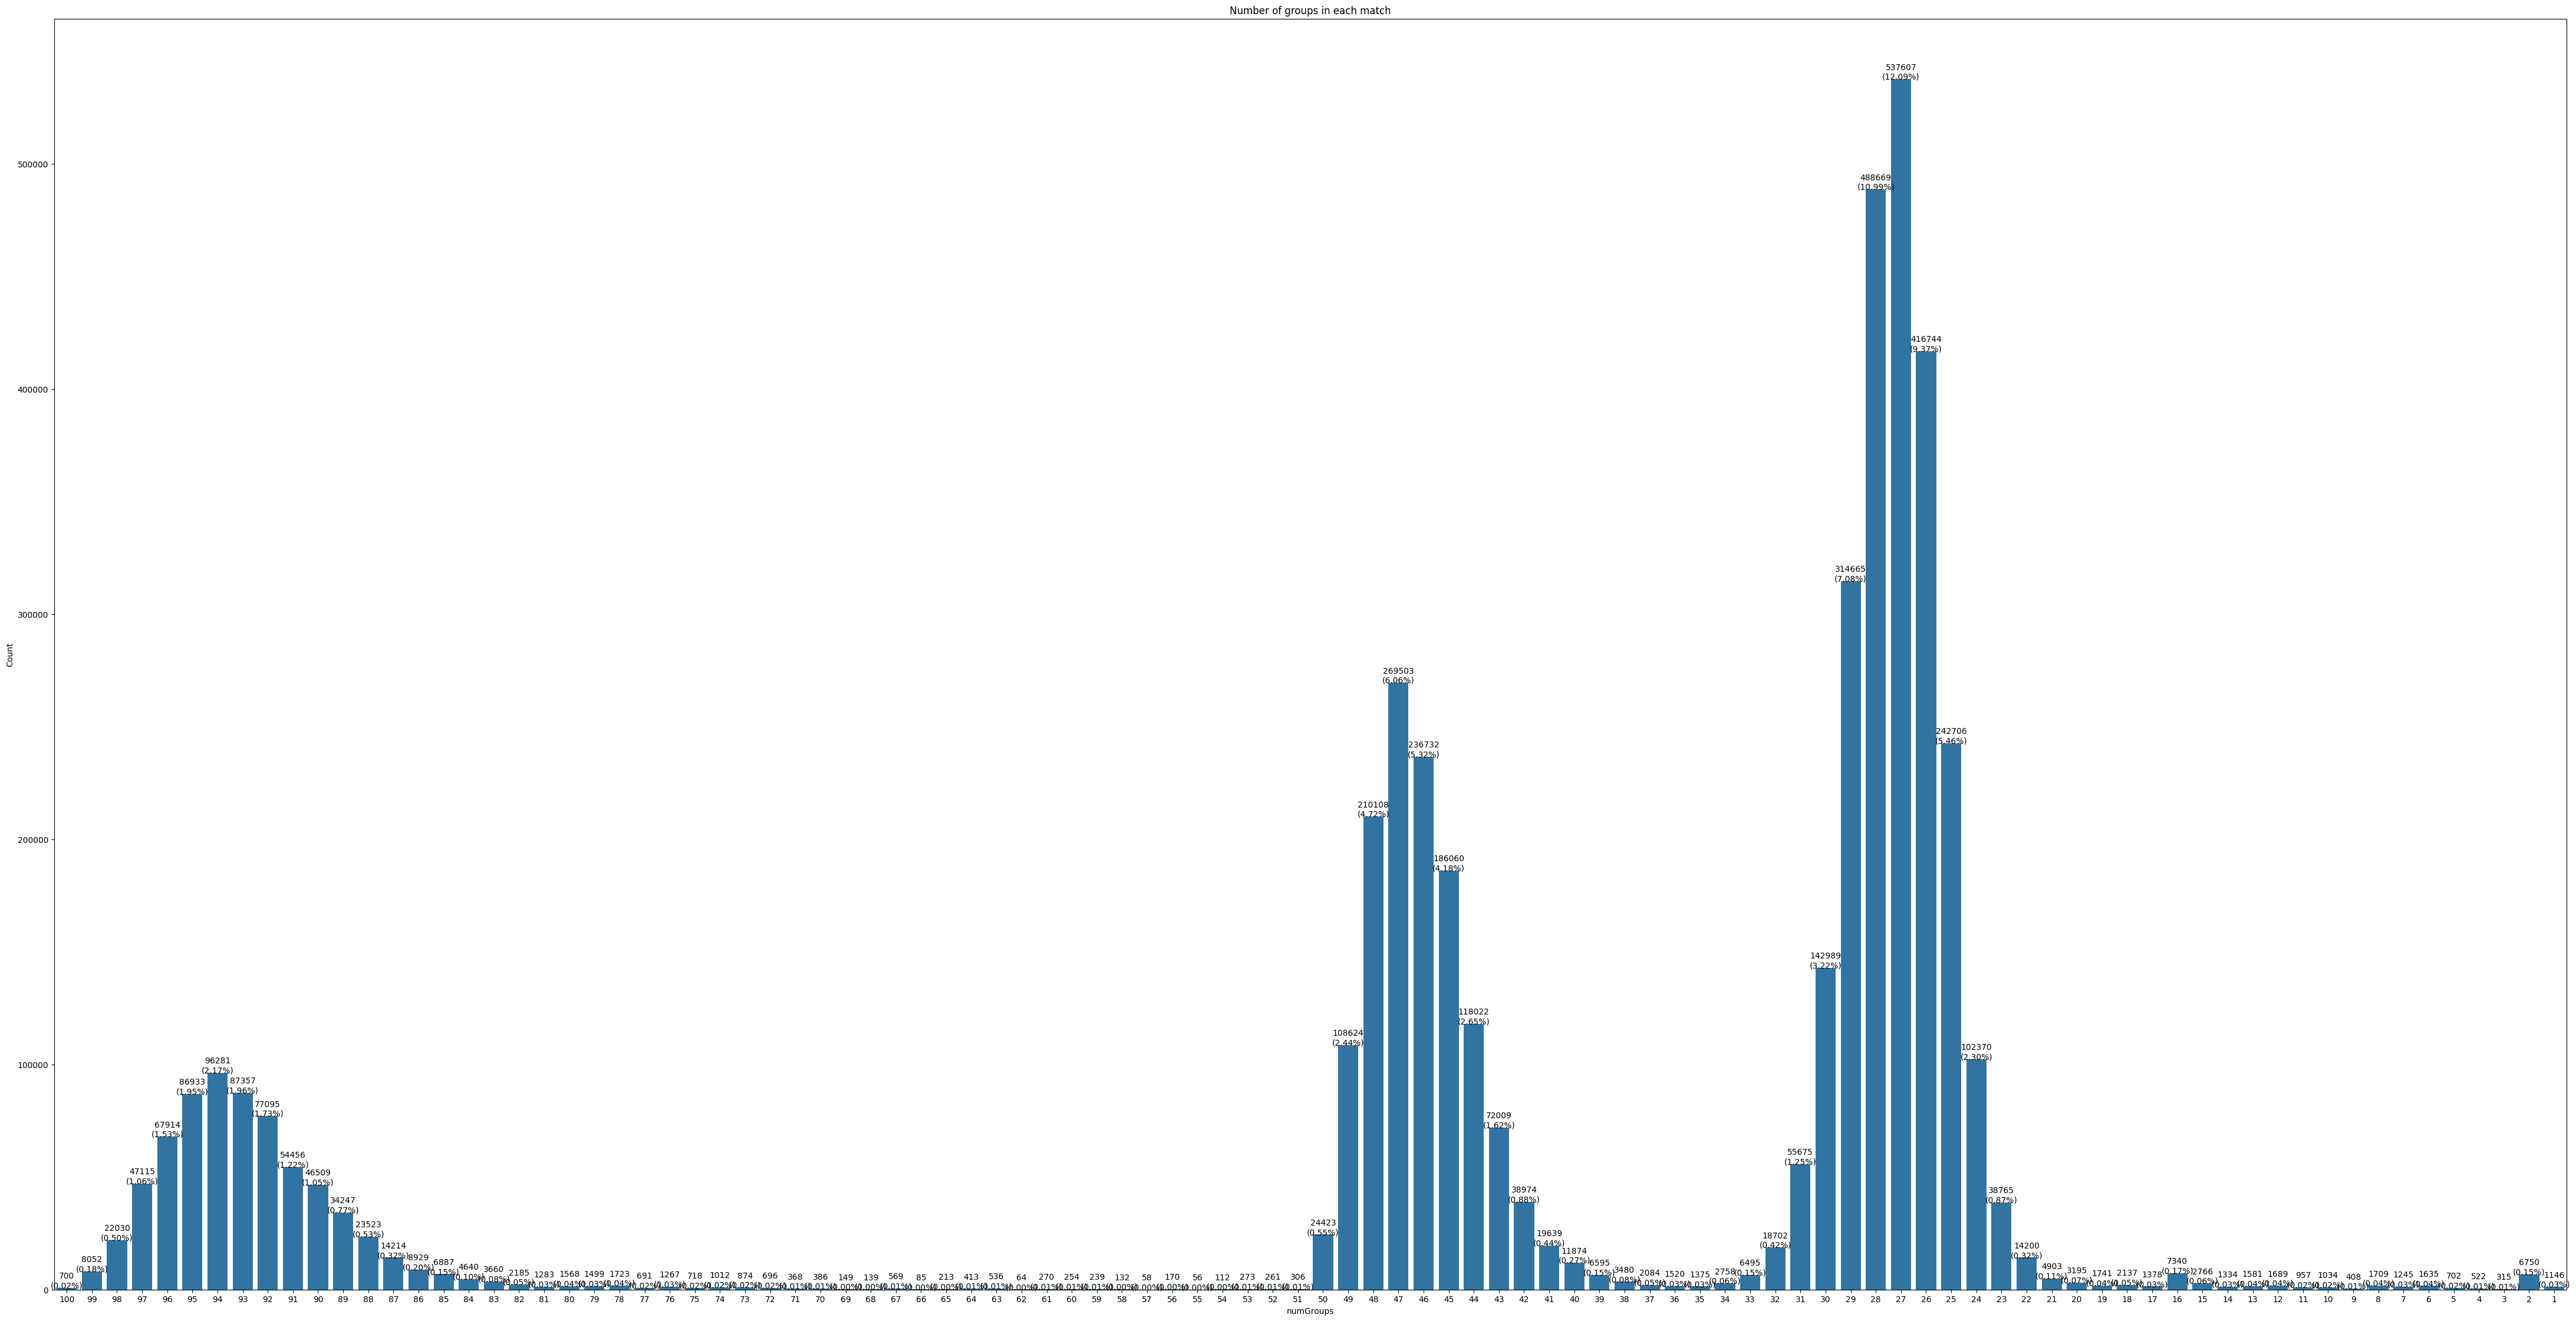

In [35]:
# plotting count of distinct groups in each match

# Count the occurrences of groups in each match
group_counts = data['numGroups'].value_counts().sort_index(ascending=False)

# Plotting
plt.figure(figsize=(55, 28))
sns.countplot(x=data['numGroups'], order=group_counts.index)

# Adding data labels with counts and percentages
total_groups = group_counts.sum()
for i, count in enumerate(group_counts):
    percent = (count / total_groups) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('numGroups')
plt.ylabel('Count')
plt.title('Number of groups in each match')
plt.show()

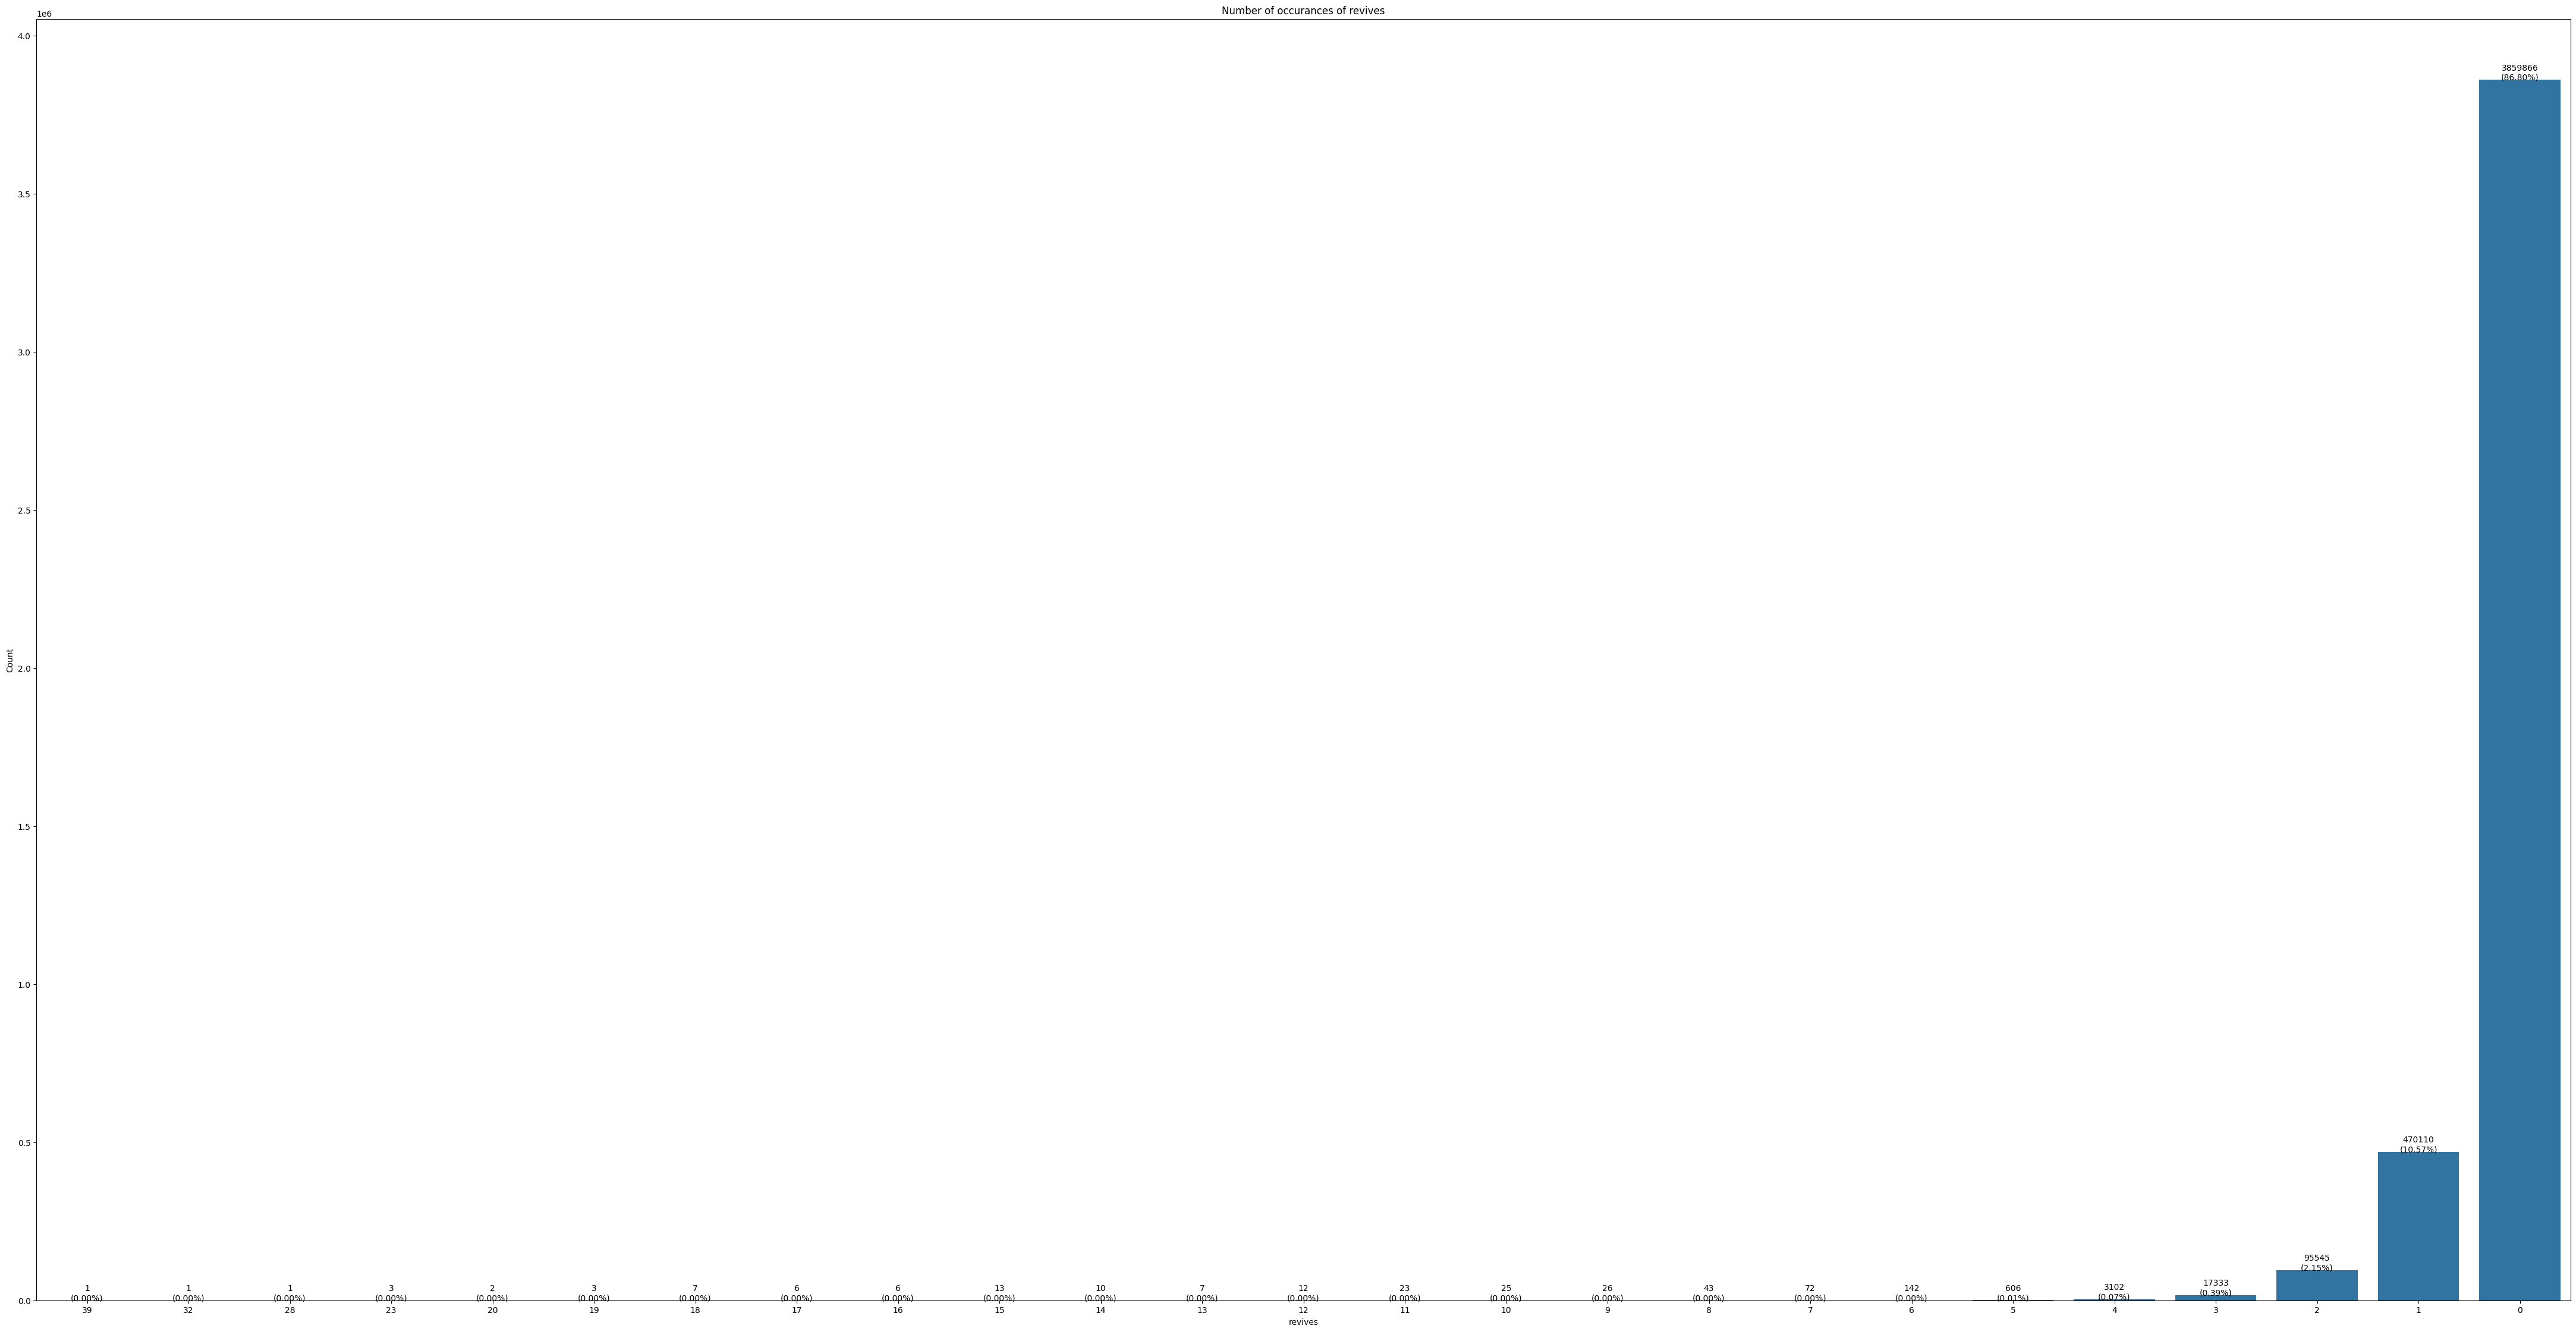

In [36]:
# plotting count of revives by each player

# Count the occurrences of revives
revive_counts = data['revives'].value_counts().sort_index(ascending=False)

# Plotting
plt.figure(figsize=(55, 28))
sns.countplot(x=data['revives'], order=revive_counts.index)

# Adding data labels with counts and percentages
total_revives = revive_counts.sum()
for i, count in enumerate(revive_counts):
    percent = (count / total_revives) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('revives')
plt.ylabel('Count')
plt.title('Number of occurances of revives')
plt.show()


### Insights
1. 86.8% of players revived zero other players.
2. Only 2.63% players revived more than one player.

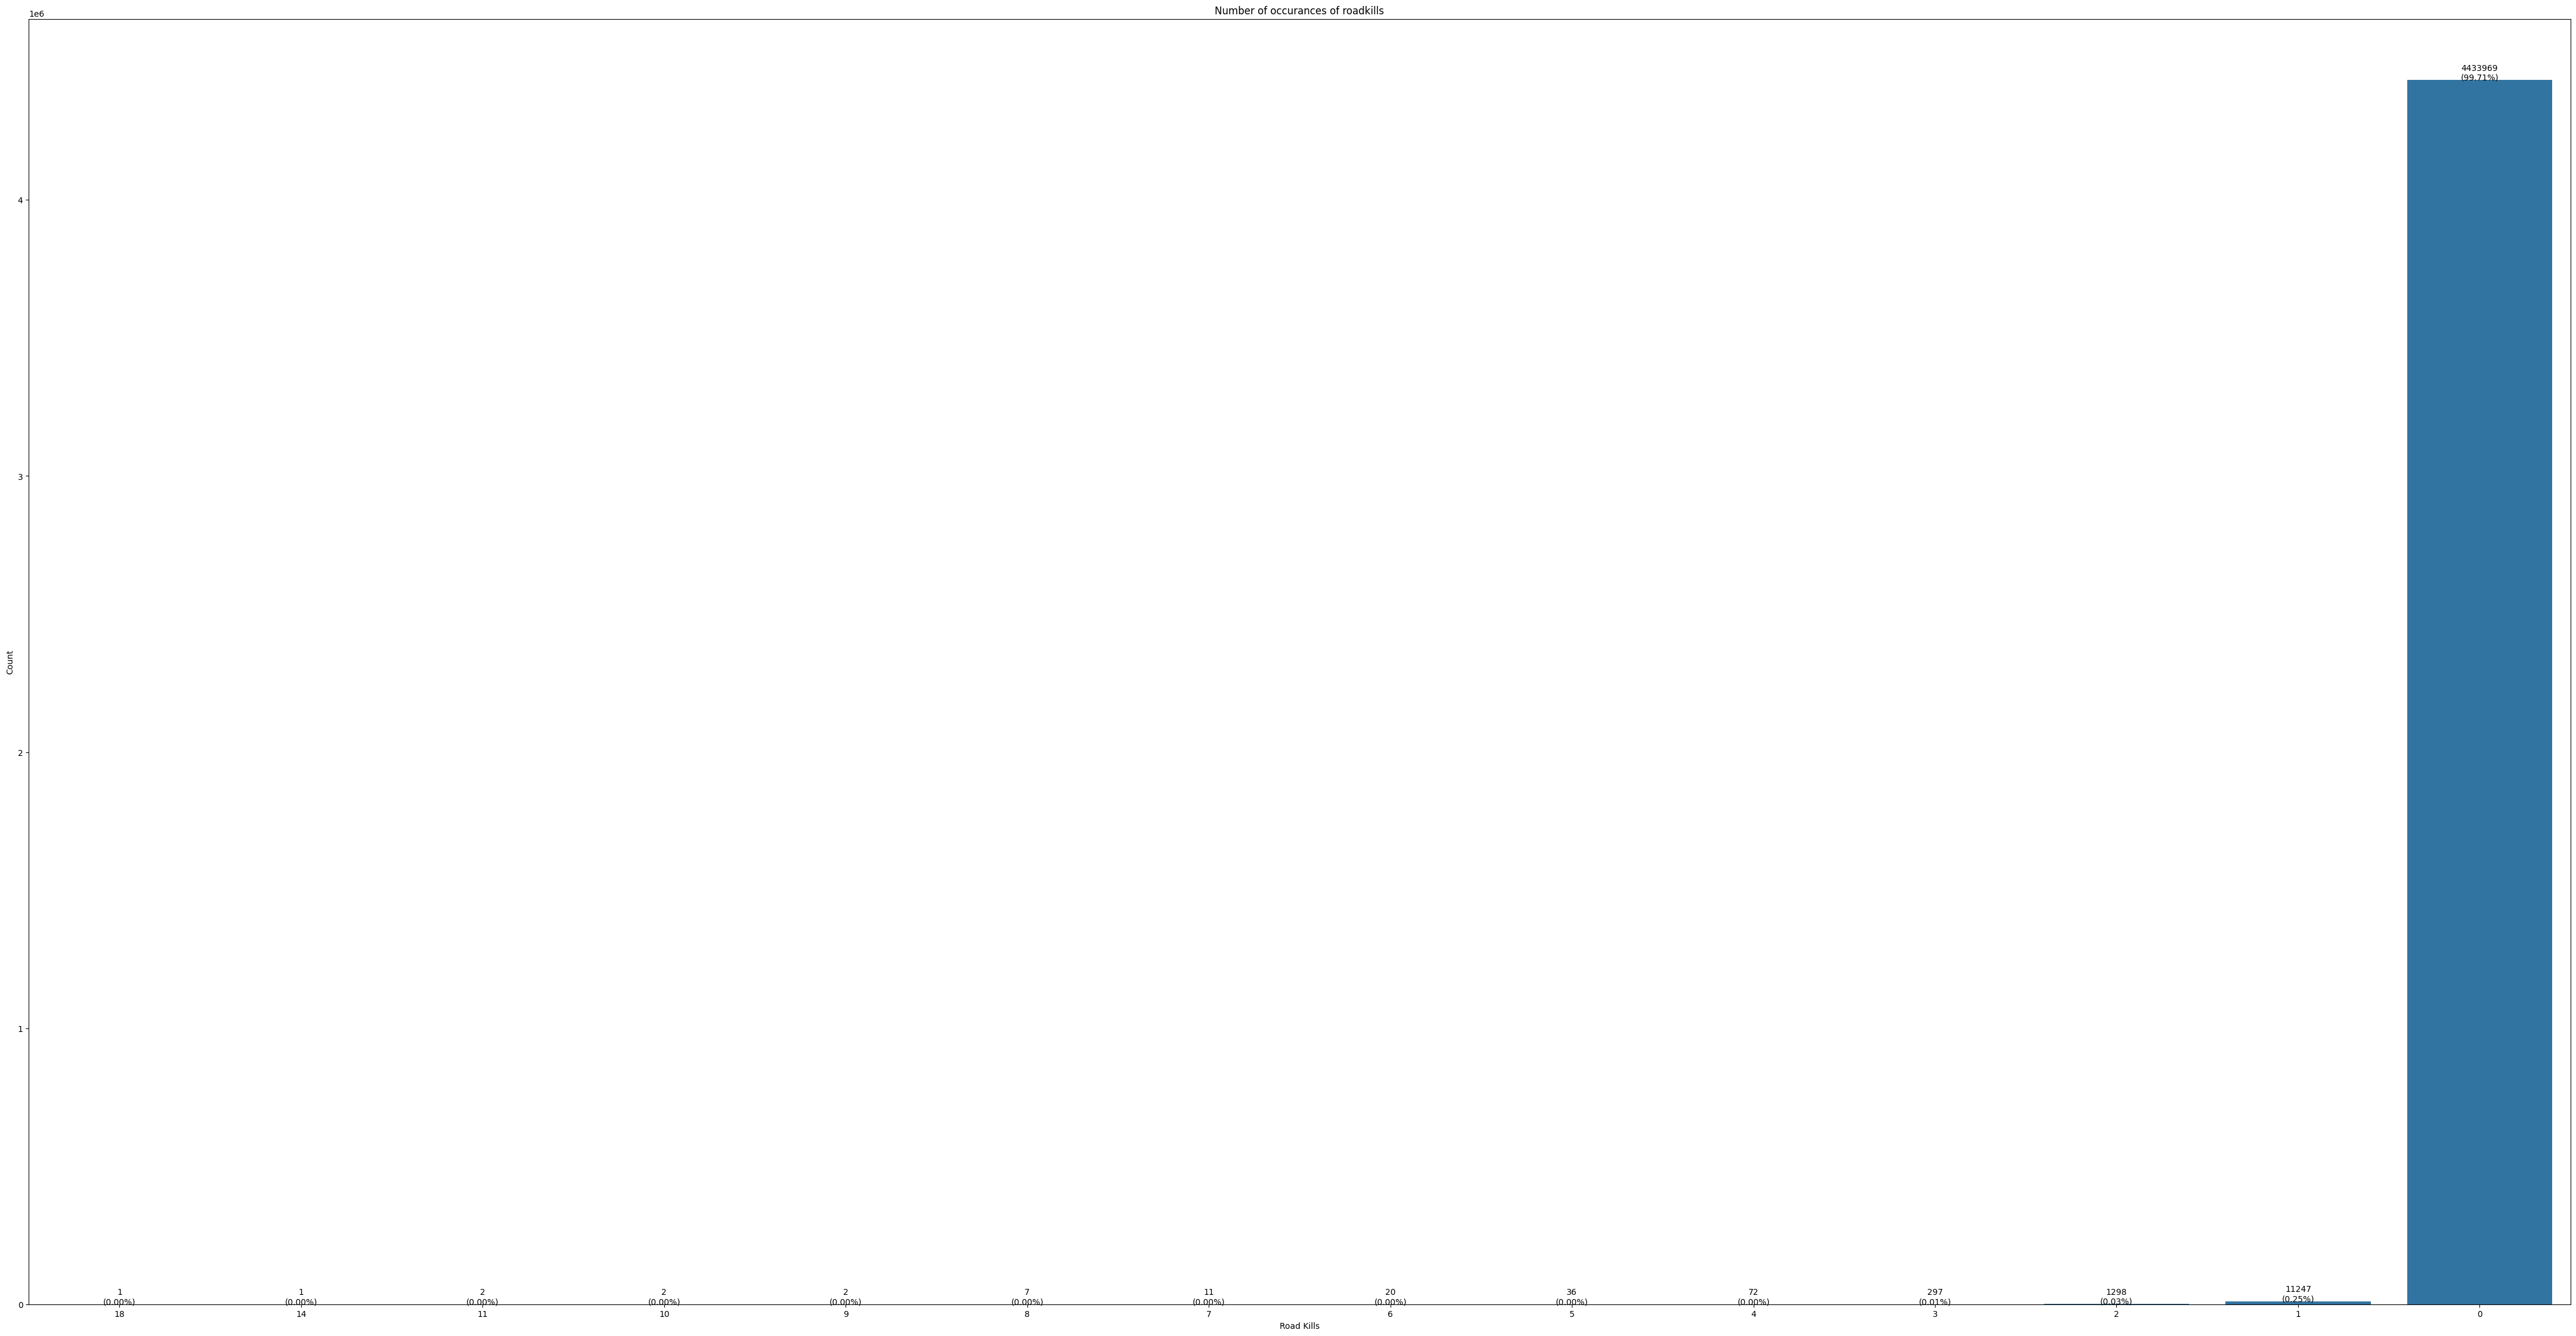

In [37]:
# plotting count of roadkills by each player

# Count the occurrences of roadkills
rk_counts = data['roadKills'].value_counts().sort_index(ascending=False)

# Plotting
plt.figure(figsize=(55, 28))
sns.countplot(x=data['roadKills'], order=rk_counts.index)

# Adding data labels with counts and percentages
total_rks = rk_counts.sum()
for i, count in enumerate(rk_counts):
    percent = (count / total_rks) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Road Kills')
plt.ylabel('Count')
plt.title('Number of occurances of roadkills')
plt.show()


### Insight
99.71% of players had zero road kills

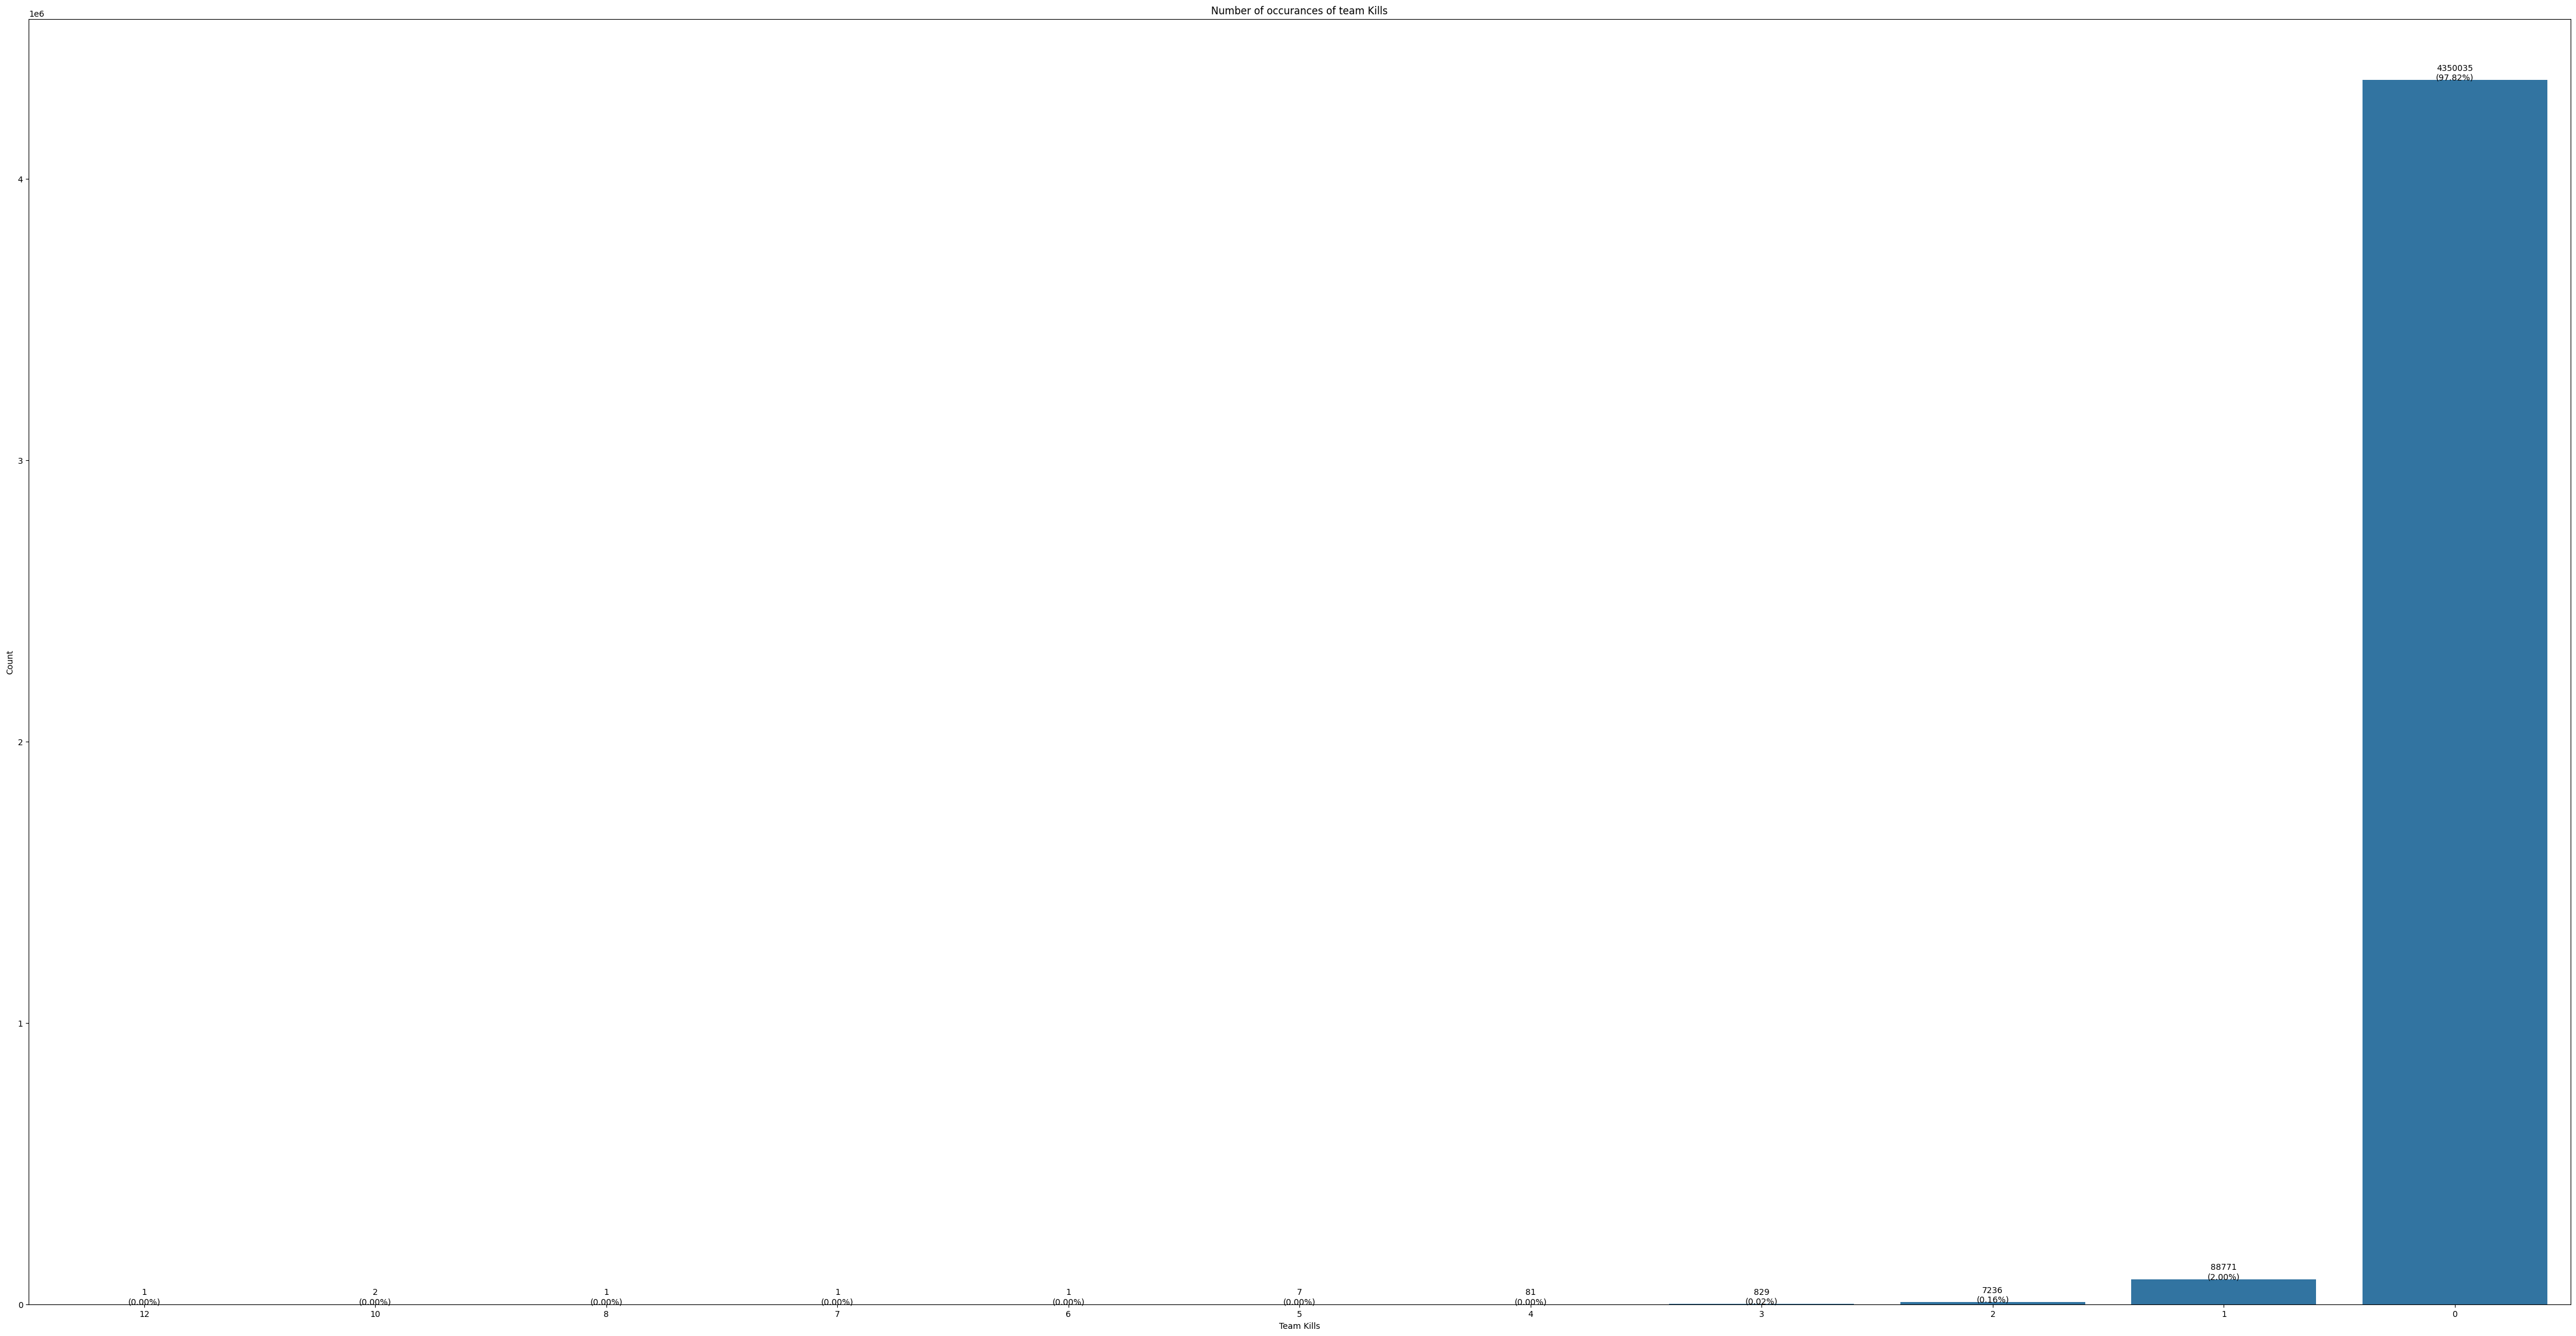

In [38]:
# plotting number of times player killed a teammate

# Count the occurrences of team kills
tk_counts = data['teamKills'].value_counts().sort_index(ascending=False)

# Plotting
plt.figure(figsize=(55, 28))
sns.countplot(x=data['teamKills'], order=tk_counts.index)

# Adding data labels with counts and percentages
total_tks = tk_counts.sum()
for i, count in enumerate(tk_counts):
    percent = (count / total_tks) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Team Kills')
plt.ylabel('Count')
plt.title('Number of occurances of team Kills')
plt.show()


### Insight
97.825 players had zero team kills

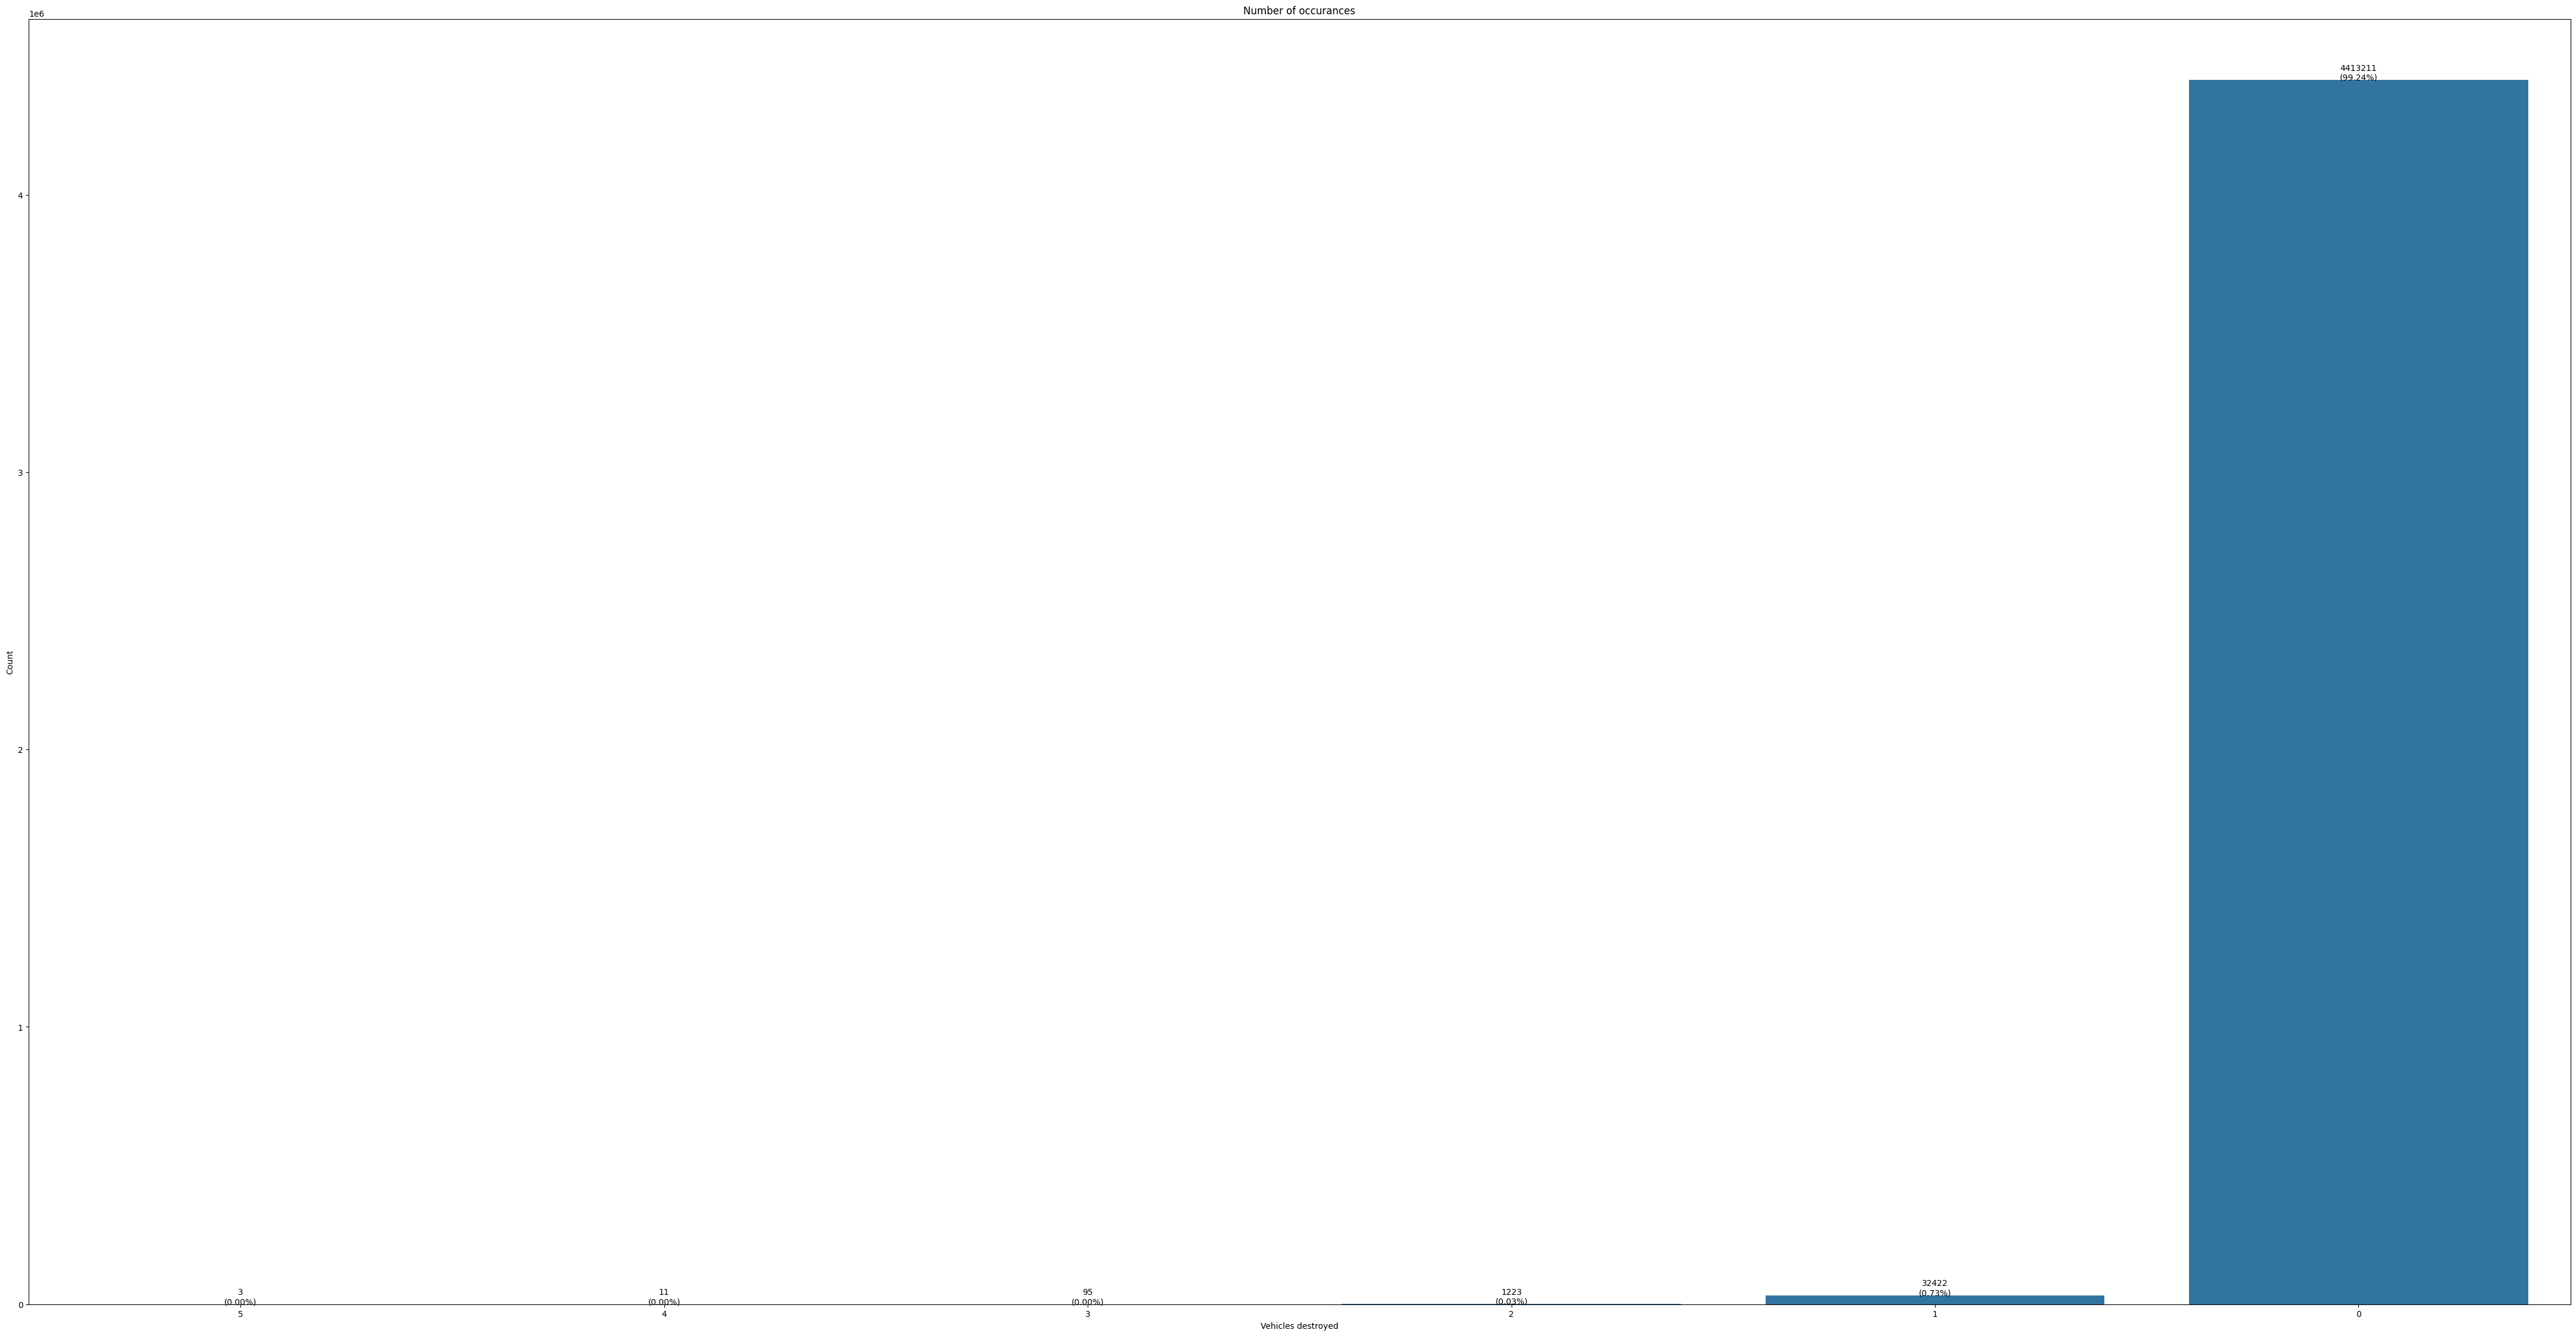

In [39]:
# plotting count of vehicles destroyed by each player

# Count the number  of vehicles destroyed
vd_counts = data['vehicleDestroys'].value_counts().sort_index(ascending=False)

# Plotting
plt.figure(figsize=(55, 28))
sns.countplot(x=data['vehicleDestroys'], order=vd_counts.index)

# Adding data labels with counts and percentages
total_vds = vd_counts.sum()
for i, count in enumerate(vd_counts):
    percent = (count / total_vds) * 100
    plt.text(i, count + 0.5, f"{count}\n({percent:.2f}%)", ha='center')

plt.xlabel('Vehicles destroyed')
plt.ylabel('Count')
plt.title('Number of occurances')
plt.show()


### Insight
99.245 players did not destroy any vehicles

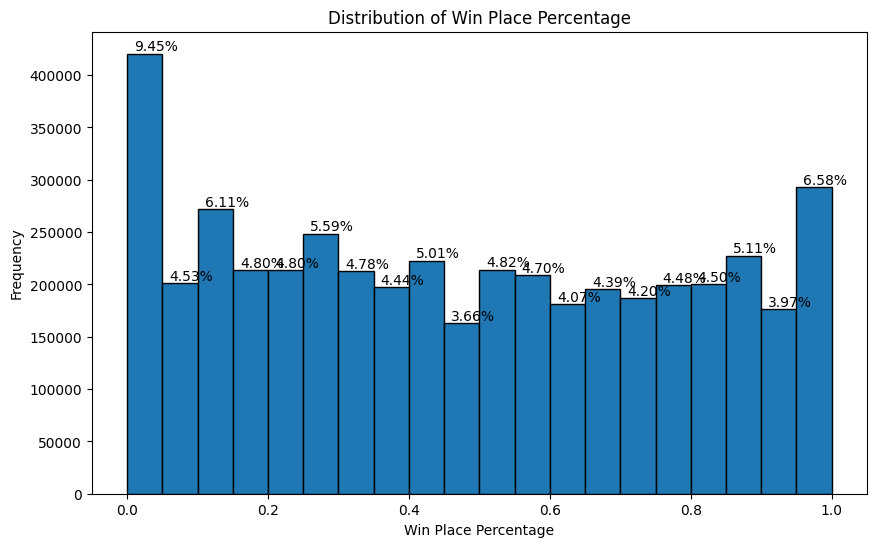

In [40]:
# Plotting the distribution of win place percentage

plt.figure(figsize=(10, 6))
plt.hist(data['winPlacePerc'], bins=20, edgecolor='black')

# Calculate bin counts and edges
counts, edges = np.histogram(data['winPlacePerc'], bins=20)

# Adding labels and title
plt.xlabel('Win Place Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Win Place Percentage')

# Adding percentages to the bars
total_count = len(data['winPlacePerc'])
for count, edge in zip(counts, edges):
    percent = 100 * count / total_count
    plt.text(edge + 0.01, count, f"{percent:.2f}%", va='bottom')

plt.show()

### Insight
20.16% had win place percentage (target variable) more than 80% 

### Bivariate analysis

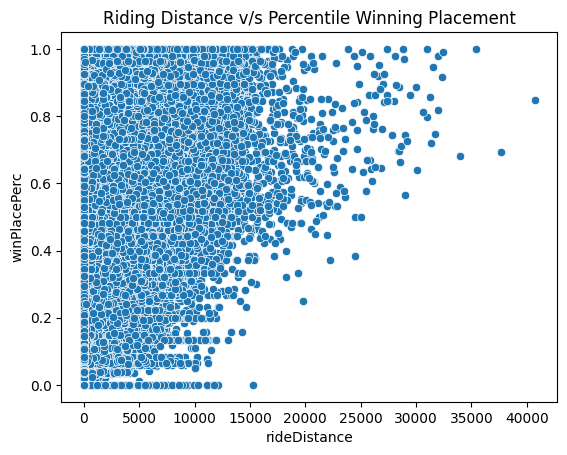

In [41]:
# plotting relation between Riding Distance and winning placement percentage
plt.title("Riding Distance v/s Percentile Winning Placement")
sns.scatterplot(x='rideDistance', y='winPlacePerc' , data=data);

### Insight
There seems to be low strength positive correlation between ride Distance and win placement percentile.

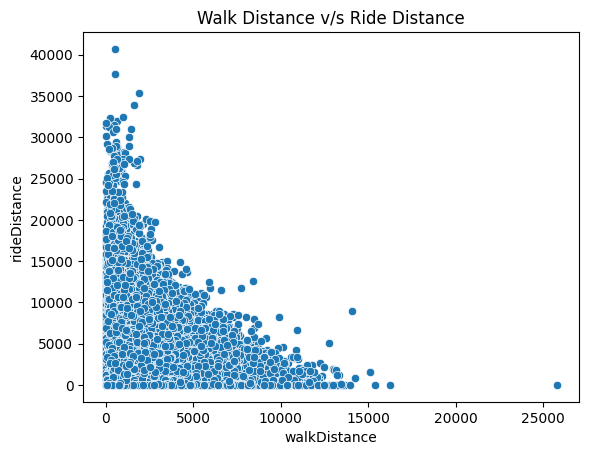

In [42]:
# plotting relation between walking distance and riding distance
plt.title("Walk Distance v/s Ride Distance")
sns.scatterplot(x='walkDistance', y='rideDistance' , data=data);

### Insight
Walking distance and riding distance are inversely proportional to each other, with riding distance increasing when the walking distance reduces and vice versa

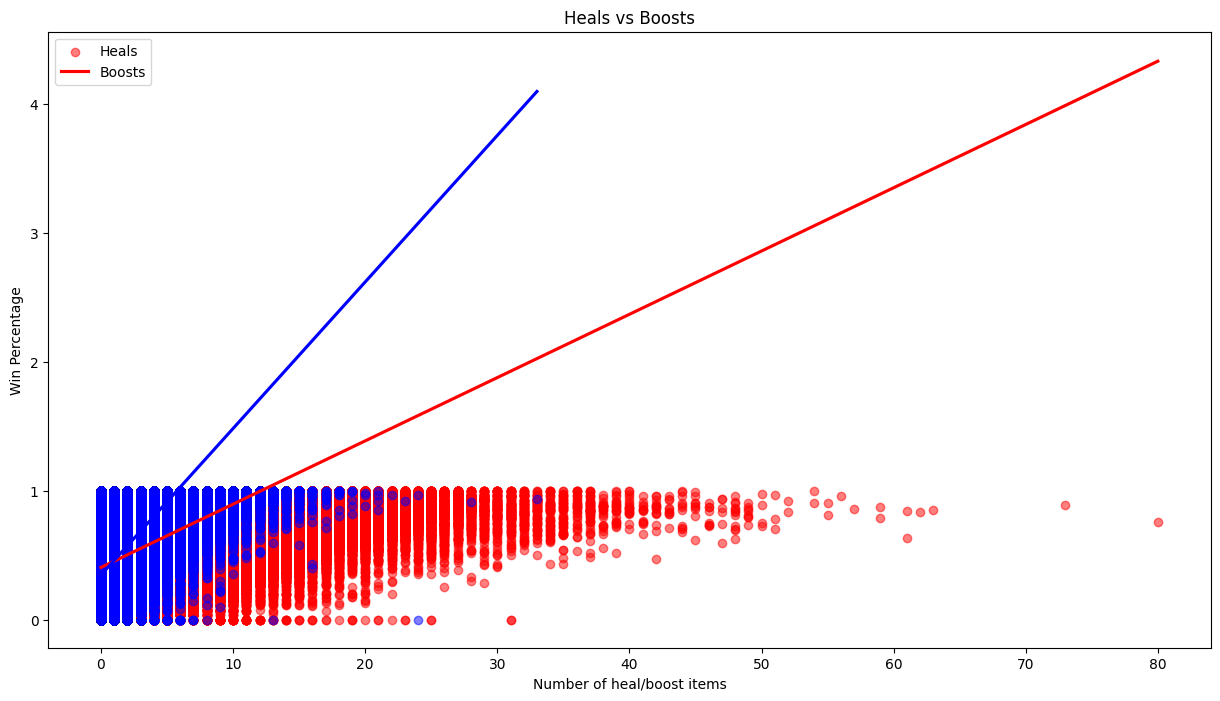

In [43]:
plt.figure(figsize=(15, 8))
sns.regplot(x='heals', y='winPlacePerc', data=data, scatter_kws={'color': 'red', 'alpha': 0.5}, line_kws={'color': 'red'})

# Create a scatter plot with regression line for boosts and winPlacePerc
sns.regplot(x='boosts', y='winPlacePerc', data=data, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'blue'})

# Adding labels and title
plt.xlabel('Number of heal/boost items')
plt.ylabel('Win Percentage')
plt.title('Heals vs Boosts')

# Adding legend
plt.legend(['Heals', 'Boosts'])

plt.show()

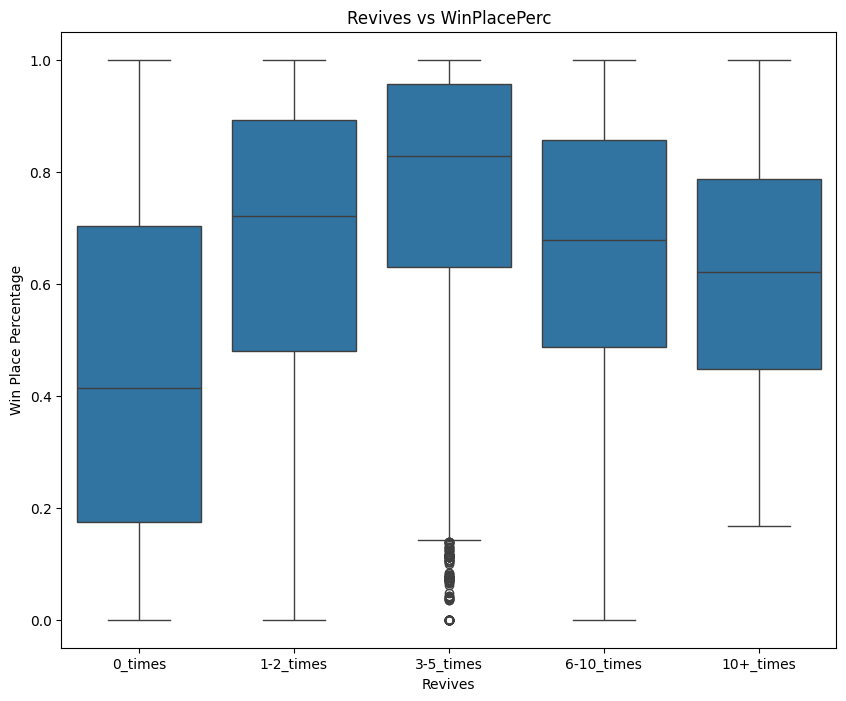

In [44]:
# plotting relation between number of revives and win placement percentage
Label = ['0_times', '1-2_times', '3-5_times', '6-10_times', '10+_times']

Revives = pd.cut(data['revives'], [-1, 0, 2, 5, 10, 40], labels=Label)
plt.figure(figsize=(10, 8))
sns.boxplot(x=Revives, y=data["winPlacePerc"])
plt.title("Revives vs WinPlacePerc")
plt.xlabel("Revives")
plt.ylabel("Win Place Percentage")
plt.show()

### Insight
Players that revive their teammates a lot of times (3-5 times), have a higher chance of placing higher

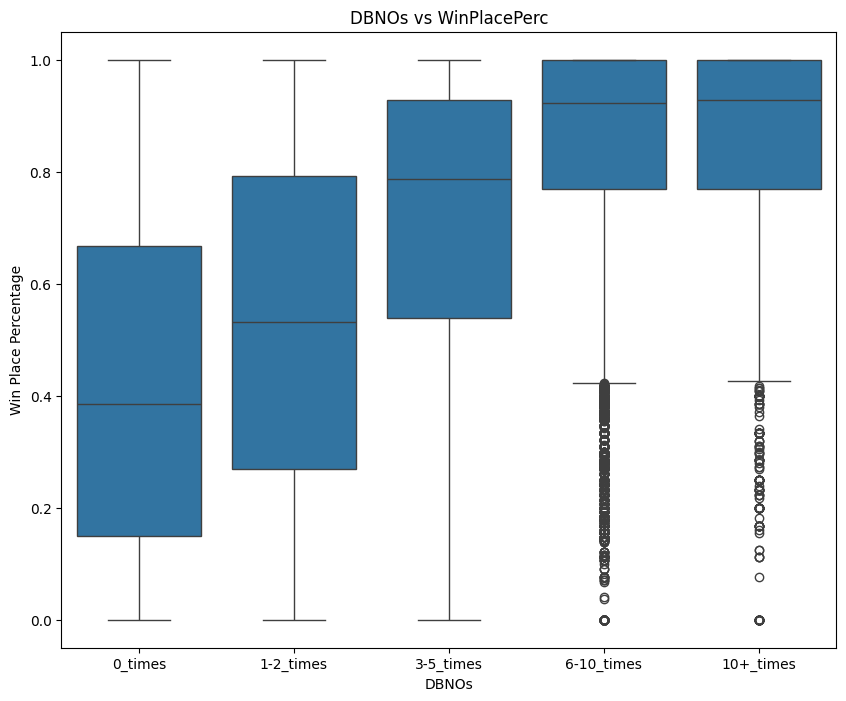

In [45]:
# plotting relation between number of DBNOs and win placement percentage
DBNOS = pd.cut(data['DBNOs'], [-1, 0, 2, 5, 10, 55], labels=Label)
plt.figure(figsize=(10, 8))
sns.boxplot(x=DBNOS, y=data['winPlacePerc'])
plt.title("DBNOs vs WinPlacePerc")
plt.xlabel("DBNOs")
plt.ylabel("Win Place Percentage")
plt.show()

### Insight
Winning percentage increases with increase in no. of enemies knocked down (DBNOs).

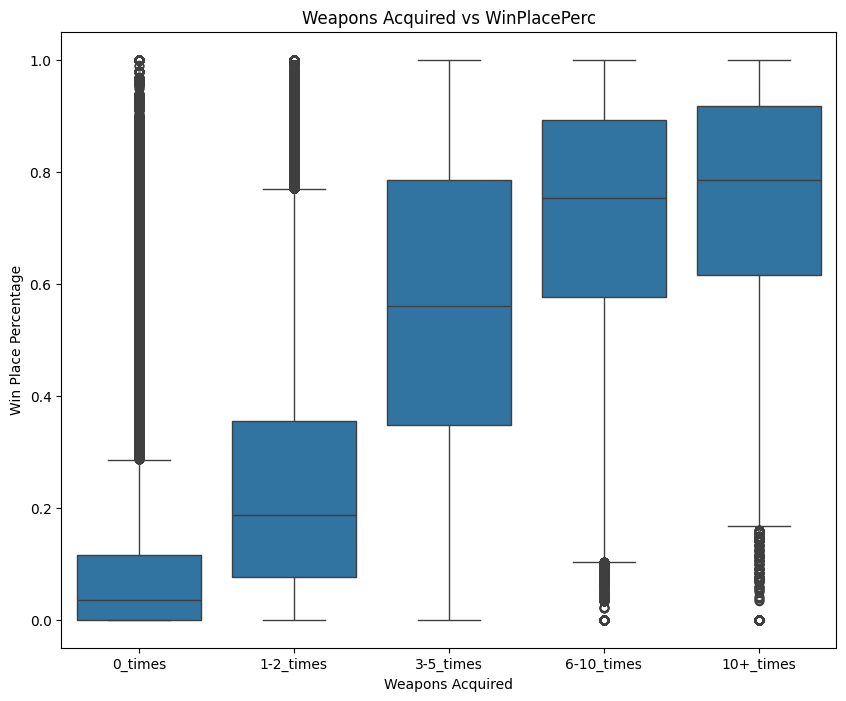

In [46]:
# relation between weapons acquired and win place percentage
Weapons = pd.cut(data['weaponsAcquired'], [-1, 0, 2, 5, 10, 40], labels=['0_times', '1-2_times', '3-5_times', '6-10_times', '10+_times'])
plt.figure(figsize=(10, 8))
sns.boxplot(x=Weapons, y=data["winPlacePerc"])
plt.title("Weapons Acquired vs WinPlacePerc")
plt.xlabel("Weapons Acquired")
plt.ylabel("Win Place Percentage")
plt.show()

### Insight
Players acquiring more weapons have more chances of winning. There seems to be high positive correalation between weaponsAcquired and winPlacePerc.

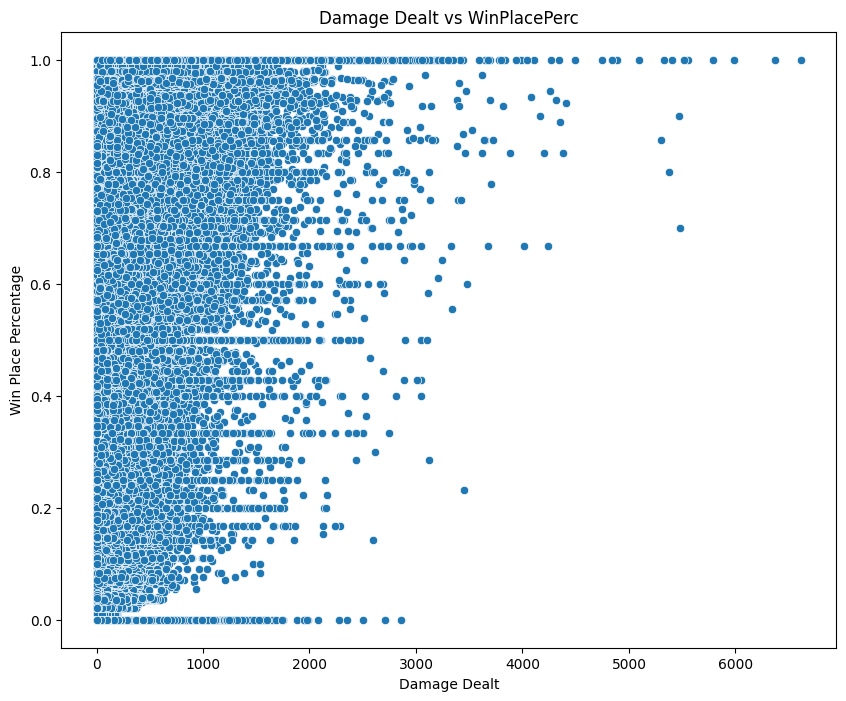

In [47]:
# relation between Damage dealt and win placement percentage
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='damageDealt', y='winPlacePerc')
plt.title("Damage Dealt vs WinPlacePerc")
plt.xlabel("Damage Dealt")
plt.ylabel("Win Place Percentage")
plt.show()

### Insight
Damage Dealt is positively correlated with winning placement percentile.

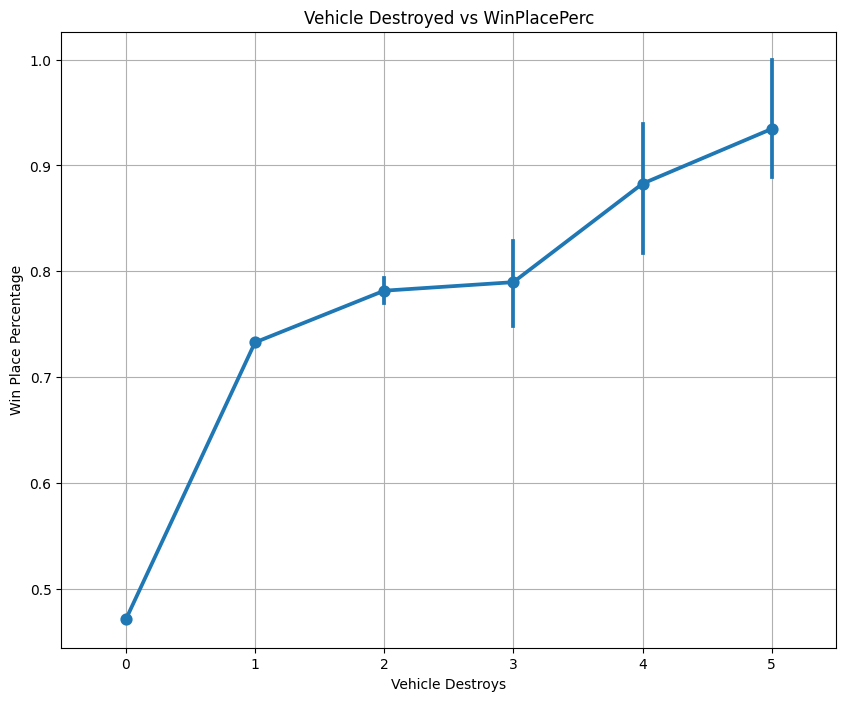

In [48]:
# relation between number of vehicles destroyed and win place percentage
plt.figure(figsize=(10, 8))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data)
plt.grid()
plt.title("Vehicle Destroyed vs WinPlacePerc")
plt.xlabel("Vehicle Destroys")
plt.ylabel("Win Place Percentage")
plt.show()

### Insight
Destroying even a single vehicle increases the chance of winnig.

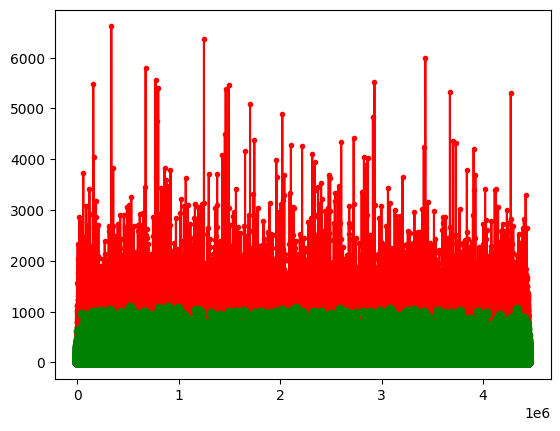

In [49]:
# relation between damage dealt and longest kill
plt.plot(data['damageDealt'],color='r',marker='.')
plt.plot (data['longestKill'],color='g',marker='o')

In [50]:
# correlation heatmap
corrmat=data.corr(numeric_only=True)
corrmat.style.background_gradient(cmap='coolwarm')

In [51]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True).abs()

# Unstack the correlation matrix
unstacked_correlations = correlation_matrix.unstack()

# Filter out duplicate pairs of correlations
unique_correlations = unstacked_correlations[unstacked_correlations.index.get_level_values(0) < unstacked_correlations.index.get_level_values(1)]

# Sort the absolute correlations
sorted_correlations = unique_correlations.sort_values(ascending=False)

# Display the sorted absolute correlations
sorted_correlations

maxPlace         numGroups          0.997900
rankPoints       winPoints          0.993845
killPoints       winPoints          0.983417
                 rankPoints         0.975555
damageDealt      kills              0.888783
walkDistance     winPlacePerc       0.810888
killPlace        killStreaks        0.810517
killStreaks      kills              0.802500
DBNOs            damageDealt        0.735763
killPlace        kills              0.730499
                 winPlacePerc       0.719069
DBNOs            kills              0.707848
damageDealt      killStreaks        0.703599
                 killPlace          0.677398
headshotKills    kills              0.674275
DBNOs            killStreaks        0.646872
boosts           walkDistance       0.640150
                 winPlacePerc       0.634234
damageDealt      headshotKills      0.613409
kills            longestKill        0.602936
killPlace        walkDistance       0.590236
weaponsAcquired  winPlacePerc       0.583806
damageDeal

### Insight
There are high correlations (correlation above 75%) between a lot of columns, namely 'numGroups','rankPoints','winPoints' and 'killStreaks'. These columns need to be dropped

In [52]:
data.drop(columns=['numGroups','rankPoints','winPoints','killStreaks'],inplace=True)

### Insight
The column walkDistance also has high correlation with the target variabla but it can be dealt by creating a new feature called total distance, combining the walking, swimming and riding distance in the feature engineering stage.

## Outlier/cheater handling

In [53]:
# printing the entries where the player has made some kills without moving
data['killswithoutmoving']=((data['kills'] > 0) & ((data['rideDistance'] + data['swimDistance'] + data['walkDistance'])== 0))
idx_to_drop = data[data['killswithoutmoving'] == True].index
len(idx_to_drop)

# dropping the newly created feature
data.drop(columns=['killswithoutmoving'],inplace=True)


We can see that there are 1535 entries where the player has killed without walking for 0 meters, which is impossible without some kind of cheating

In [54]:
# dropping the affected entries
data.drop(index=idx_to_drop,inplace=True)

In [55]:
# roadKills count
data['roadKills'].value_counts()

roadKills
0     4432434
1       11247
2        1298
3         297
4          72
5          36
6          20
7          11
8           7
9           2
11          2
10          2
14          1
18          1
Name: count, dtype: int64

We can see that most of the players have roadkills between 0 to 7, and other data points can be considered as outliers

In [56]:
# dropping entries where 'roadKills' is more than 7
data.drop(data[data['roadKills']>=10].index,inplace=True)

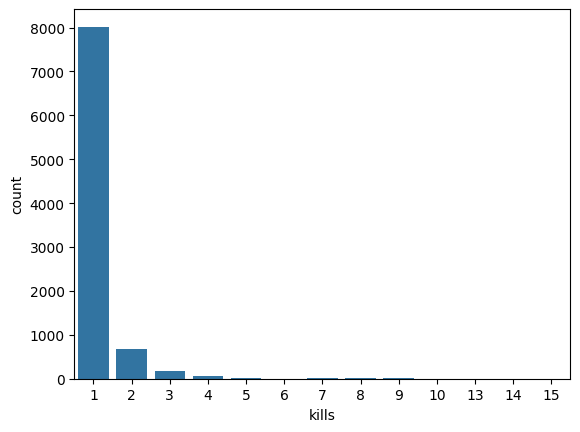

In [57]:
# plottoing the points where the number of kills is zero but longest kills isnt zero
sns.countplot(data=data[(data['longestKill']==0) & (data['kills'] > 0)], x='kills');

In [58]:
# dropping the entries with longest kills is zero and number of kills is more than zero
idx_to_drop = data[(data['longestKill']==0) & (data['kills'] > 0)].index
data.drop(idx_to_drop,axis= 0,inplace= True)

<Axes: xlabel='teamKills', ylabel='count'>

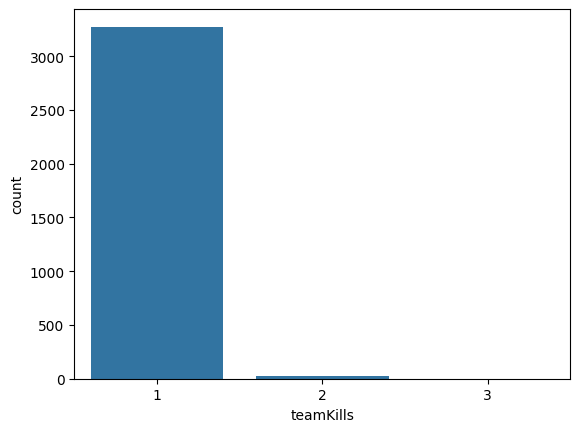

In [59]:
# entries where the number of weapons or road kills is zerio but the number of kills is more than zero
sns.countplot(data=data[(data['weaponsAcquired']==0) & (data['teamKills']>0) & (data['rideDistance']==0)], x='teamKills')

In PUBG, a player can kill his/her team-mate only if he has grenade(weapon) or he/she has drove a vehicle over his/her team-mate. But from the above graph there are some players who have killed teamplayer yet they have not acquire any weapon or drove a car/vehicle.

In [60]:
# dropping the entries with kills more than one and zero weapons acquired and did not ride for any distance
idx_to_drop = data[(data['weaponsAcquired']==0) & (data['teamKills']>0) & (data['rideDistance']==0)].index
data.drop(idx_to_drop, axis=0, inplace = True)

<Axes: xlabel='roadKills', ylabel='count'>

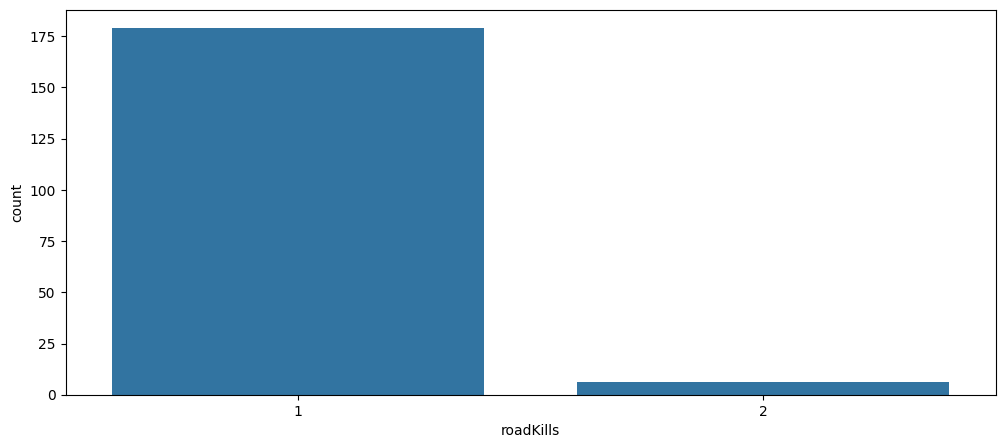

In [61]:
# entries with more than zero road kills and zero riding distance 
plt.figure(figsize=(12, 5))
sns.countplot(data=data[(data['roadKills']>0) & (data['rideDistance']==0)], x='roadKills')

Here, we can see that there are a number of entries in our dataset that have zero riding distance but more than zero roadkills, which is impossible and points towards possible cheating

In [62]:
# dropping entries with more than one roadkills but zero ride distance
idx_to_drop = data[(data['roadKills']>0) & (data['rideDistance']==0)].index
data.drop(idx_to_drop, axis=0, inplace = True)

<Axes: xlabel='heals', ylabel='count'>

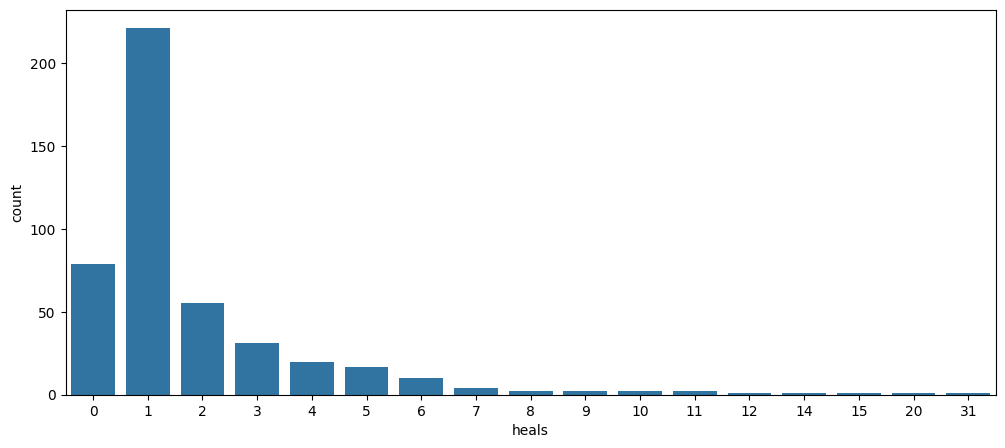

In [63]:
# entries with zero walk distance but consumed heals and boosts
plt.figure(figsize=(12, 5))
sns.countplot(data=data[((data['heals']>0) | (data['boosts']>0)) & (data['walkDistance']==0)], x='heals')

We can see that a lot of players consumed boost and healing items, with zero walk distance, which is impossible

In [64]:
# dropping these entries
idx_to_drop = data[((data['heals']>0) | (data['boosts']>0)) & (data['walkDistance']==0)].index
data.drop(idx_to_drop, axis=0, inplace = True)

<Axes: xlabel='weaponsAcquired', ylabel='count'>

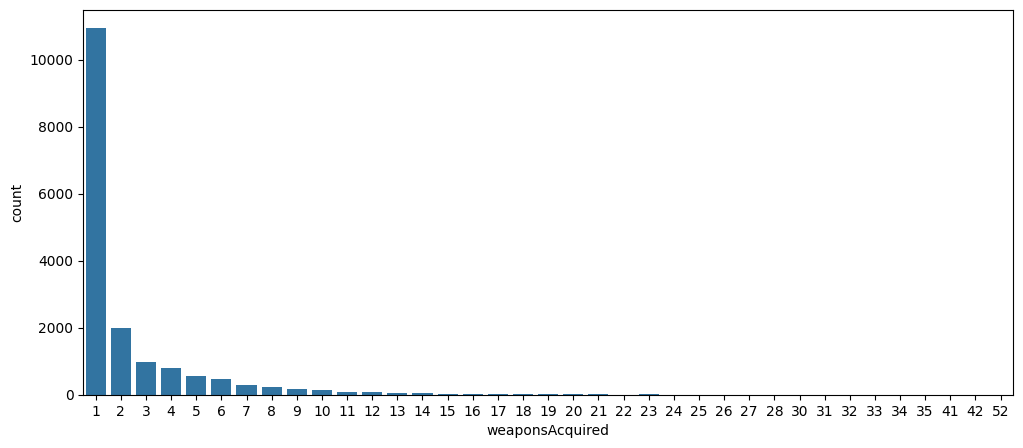

In [65]:
# entries where the player has acquired a weapon but the walk distance is zero
plt.figure(figsize=(12, 5))
sns.countplot(data=data[(data['weaponsAcquired']>0) & (data['walkDistance']==0)], x='weaponsAcquired')

It is not possible for a player to acquire a weapon with zero walk distance without cheating

In [66]:
# dropping the entries with zero walk distance and more than zero weapons acquired
idx_to_drop = data[(data['weaponsAcquired']>0) & (data['walkDistance']==0)].index
data.drop(idx_to_drop, axis=0, inplace = True)

 the number of affected entries is : 39662


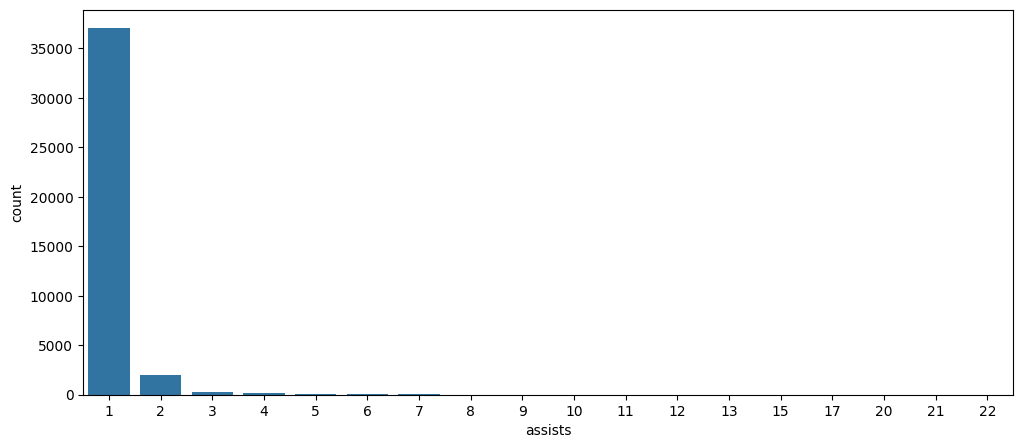

In [67]:
# plotting the number of entries where the match type is solo but the number of assists is more than zero
plt.figure(figsize=(12, 5))
sns.countplot(data=data[(data['matchType']=='solo') & (data['assists']>0)], x='assists')
filtered_data=data[(data['matchType']=='solo') & (data['assists']>0)]
num_entries=len(filtered_data)
print(' the number of affected entries is :',num_entries)


In [68]:
# dropping the entries where the match type is solo and the number of assists is more than zero
idx_to_drop=filtered_data.index
data.drop(idx_to_drop,axis=0, inplace=True)

<Axes: xlabel='assists', ylabel='count'>

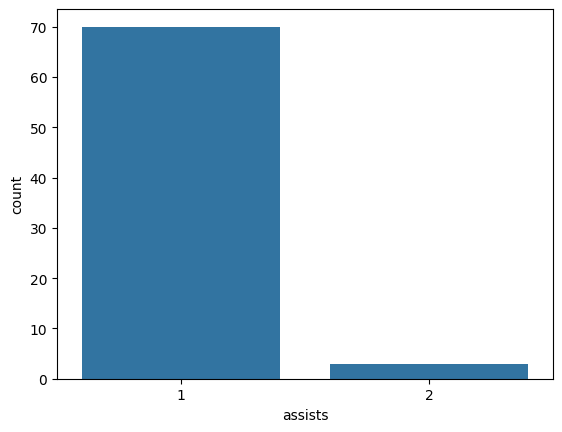

In [69]:
# plotting the number of entries where assists is more than zero but the walking distance is zero
filtered_data=data[(data['assists']>0) & (data['walkDistance']==0)]
sns.countplot(filtered_data,x='assists')

In [70]:
# dropping the entries where the walk distance is zero while the  number of assists is more than zero
idx_to_drop=filtered_data.index
data.drop(idx_to_drop,axis=0, inplace=True)

In [71]:
# plotting the number enemy players killed
data['kills'].value_counts()

kills
0     2495479
1      910602
2      465771
3      228197
4      121839
5       64893
6       36725
7       21058
8       12217
9        7239
10       4347
11       2611
12       1611
13       1027
14        674
15        424
16        279
17        194
18        135
19         78
20         72
22         52
21         45
23         32
24         31
26         17
25         15
28         13
33          9
30          7
29          7
27          7
31          5
35          4
40          4
38          4
36          3
34          3
37          3
57          2
41          2
46          2
42          1
53          1
43          1
45          1
49          1
32          1
44          1
72          1
55          1
Name: count, dtype: int64

Players with more than 28 kills are pretty rare, thus those entries can be considered as outliers


In [72]:
# dropping these points
data.drop(data[data['kills']>28].index,inplace=True)

<Axes: xlabel='longestKill', ylabel='Density'>

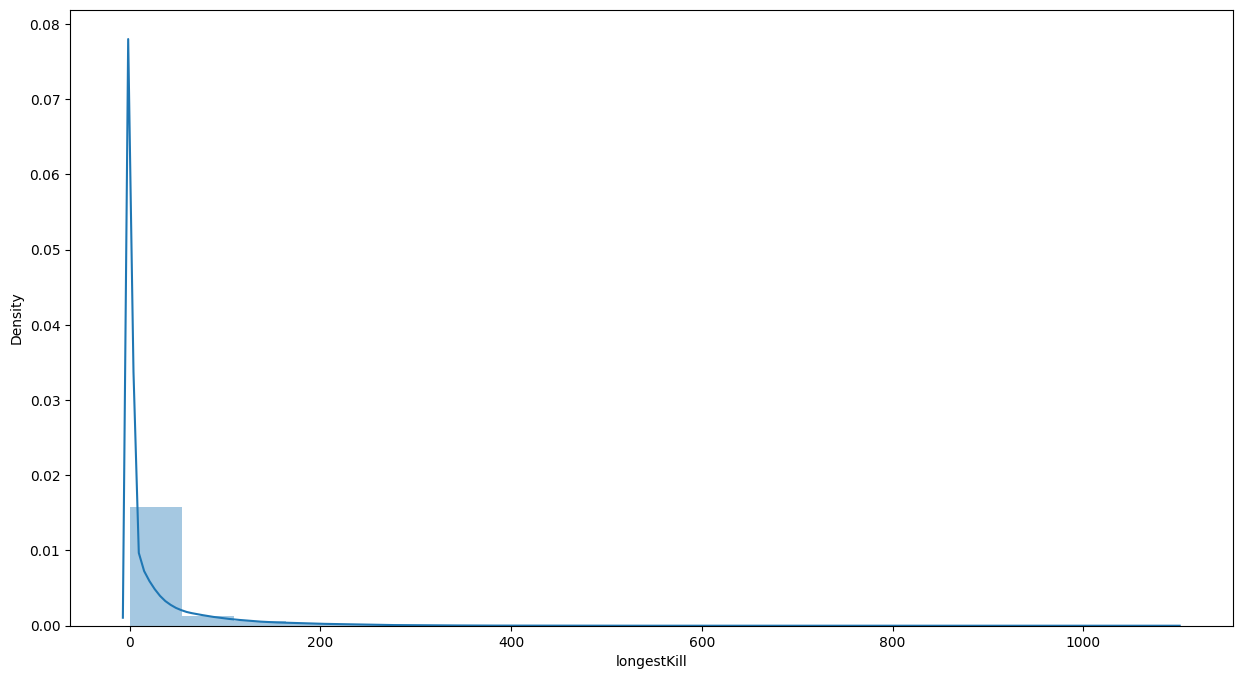

In [73]:
# plotting the longest kills made by players
plt.subplots(figsize=(15,8))
sns.distplot(data['longestKill'],bins=20)

We can see that most of the kills are made at distances under 100 meters, but there are a few outliers that have made kills from more than 1000 metres away, which points towards probable cheating

In [74]:
# dropping all entries over 800 metres
data.drop(data[data['longestKill']>800].index,inplace=True)

<Axes: xlabel='walkDistance', ylabel='Density'>

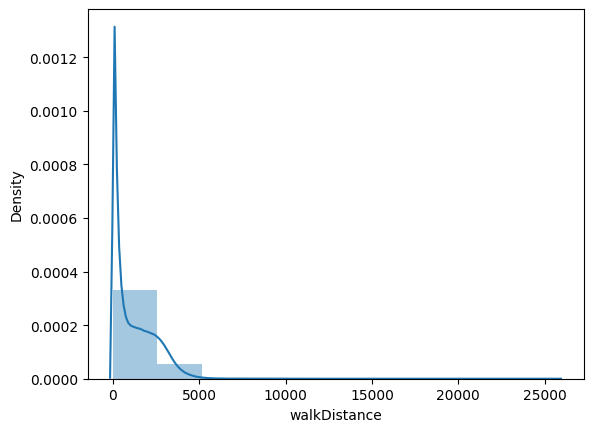

In [75]:
# plotting walking distance
sns.distplot(data['walkDistance'],bins=10)

We can see that most of the players walked under 5000 metres. Considering the fact that PUBG map is under 8kmx8km, we can safely consider entries having walkDistance over 10000 metres as outliers

In [76]:
# dropping the outliers
data.drop(data[data['walkDistance']>=10000].index,inplace=True)

<Axes: xlabel='rideDistance', ylabel='Density'>

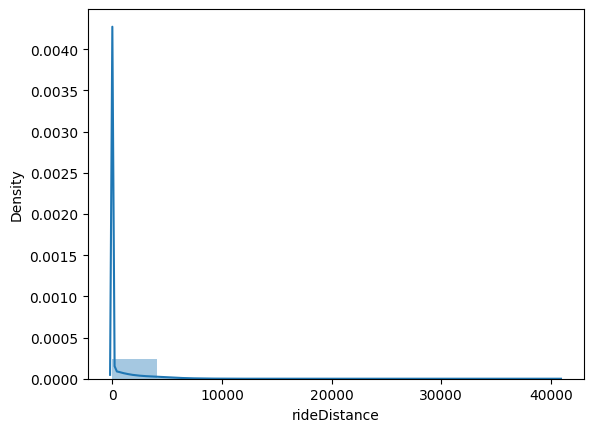

In [77]:
# plotting riding distance
sns.distplot(data['rideDistance'],bins=10)

Similar to walkDistance, we can safely consider values over 10000 as outliers

In [78]:
data.drop(data[data['rideDistance']>=10000].index,inplace=True)

<Axes: xlabel='swimDistance', ylabel='Density'>

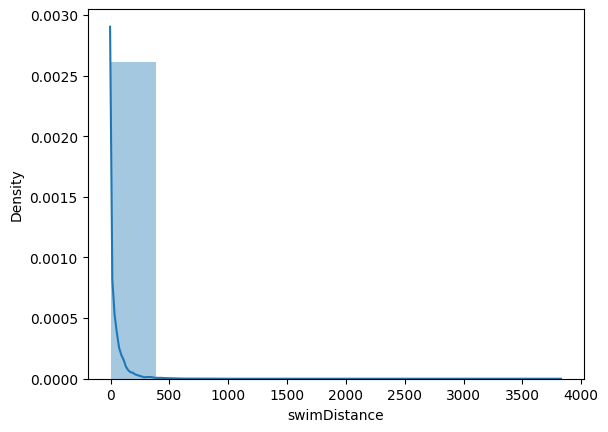

In [79]:
# plotting swimming Distance
sns.distplot(data['swimDistance'],bins=10)

Similarly, all entries with swimming as 1000 can be considered as outliers

In [80]:
# dropping these outliers
data.drop(data[data['swimDistance']>=1000].index,inplace=True)

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

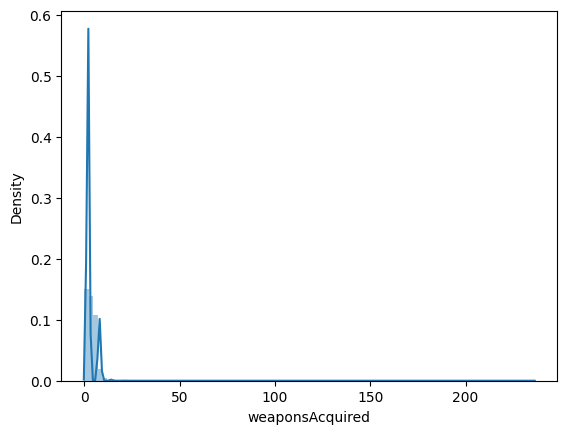

In [81]:
# plotting weapons acquired
sns.distplot(data['weaponsAcquired'],bins=100)

A very small number of players acquired more than 25 weapons. It is not common in this game to acquire a large number of weapons and a player can only hold a maximum of 3 weapons at any time anyways. Thus all entries with weaponsAcquired as more than 25 can be considered as outliers

In [82]:
# dropping these outliers
data.drop(data[data['weaponsAcquired']>=25].index,inplace=True)

<Axes: xlabel='heals', ylabel='Density'>

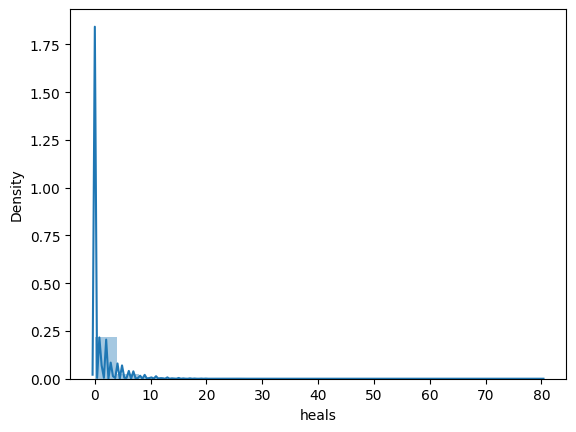

In [83]:
# plotting healing items used
sns.distplot(data['heals'],bins=20)

As evident from the data, its very rare to use more than 30 healing items in one game. thus all entries with more than 30 healing items can be considered as outliers

In [84]:
# dropping these outliers
data.drop(data[data['heals']>=30].index,inplace=True)

In [85]:
# checking the shape of data after correlation analysis and outlier/cheater handling
data.shape

(4366920, 25)

* number of entries before outlier/cheater handling: 4446966
* number of entries after outlier/cheater handling: 4366920

In [86]:
drop_percent=(((4446966-data.shape[0])*100)/4446966)
print('The percentage of entries dropped:',drop_percent)

The percentage of entries dropped: 1.8000137621920203


Thus, we can see that the percentage of entries dropped is very small and insignificant compared to the original. Thus, we can safely assume that there is no data quality loss

### Feature Engineering

In [87]:
# dropping irrelevant columns

# columns like Id,groupId,MatchId can be dropped as they act as identifier columns and contain no relavant information
cols=['Id', 'groupId', 'matchId']
data.drop(columns=cols,inplace=True)

In [88]:
# creating the total distance feature
data['totalDistance']=data['rideDistance'] + data['swimDistance'] + data['walkDistance']
# dropping the original columns
data.drop(columns=['rideDistance','swimDistance','walkDistance'],inplace=True)

In [89]:
# combininng heals and boost into one feature
data['health_items']=data['boosts']+data['heals']
# dropping the original columns
data.drop(columns=['boosts','heals'],inplace=True)

In [90]:
data.winPlacePerc.value_counts()

winPlacePerc
0.0000    207523
1.0000    123771
0.5000     54523
0.3333     42203
0.6667     37589
0.2500     33179
0.1111     29361
0.0370     28749
0.7500     28486
0.0741     27323
0.2222     27112
0.1481     25494
0.1852     24979
0.1429     24862
0.0385     23928
0.2593     23405
0.8889     23219
0.2857     23058
0.0769     22916
0.4444     22902
0.0714     22829
0.0357     22763
0.2963     22717
0.7778     22372
0.5556     22146
0.1538     21460
0.1154     21418
0.3704     21327
0.9630     21173
0.1071     20982
0.9259     20713
0.4286     20692
0.4074     20612
0.8571     20239
0.2143     20026
0.1923     19984
0.2308     19953
0.7143     19852
0.8519     19672
0.8148     19621
0.1786     19601
0.5714     19508
0.4815     19496
0.7037     19404
0.7407     19356
0.6296     19328
0.5185     19196
0.5926     19004
0.2692     18766
0.3077     18647
0.2000     18314
0.3571     17952
0.3462     17599
0.3846     17571
0.3214     17362
0.9286     17280
0.9231     17238
0.9615     17143
0

### Encoding/Scaling data

* For feature encoding, we can use pandas get_dummies function to one hot encode the categorical columns.
* For feature scaling, we can use MinMax scaler from sklearn to scale numerical columns

In [91]:
cat_col = []  # List to store categorical columns
num_col = []  # List to store numerical columns

for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        cat_col.append(column)
    elif column != 'winPlacePerc':  # Exclude 'winPlacePerc' from numerical columns
        num_col.append(column)

print("Categorical Columns:", cat_col)
print("Numerical Columns:", num_col)



Categorical Columns: ['matchType']
Numerical Columns: ['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'kills', 'longestKill', 'matchDuration', 'maxPlace', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'totalDistance', 'health_items']


In [92]:
# One-Hot Encoding categorical columns
data = pd.get_dummies(data, columns=cat_col, drop_first=True)

In [93]:
# scaling numerical columns

#initialising the MinMax scaler object
mm=MinMaxScaler()

#applying the MinMax Scaler object to the required columns
data[num_col]=mm.fit_transform(data[num_col])

In [94]:
# displaying a sample of dataframe to verify data scaling and encoding
data.sample(5)

assists  damageDealt    DBNOs  headshotKills  killPlace  killPoints  \
2520611  0.000000     0.000000  0.00000            0.0       0.52    0.000000   
2371977  0.000000     0.000000  0.00000            0.0       0.88    0.565438   
387694   0.058824     0.108365  0.09375            0.0       0.06    0.000000   
3380461  0.000000     0.000000  0.00000            0.0       0.54    0.510138   
1896931  0.000000     0.082712  0.03125            0.0       0.25    0.000000   

            kills  longestKill  matchDuration  maxPlace   revives  roadKills  \
2520611  0.000000     0.000000       0.578897  0.938775  0.000000        0.0   
2371977  0.000000     0.000000       0.609113  0.469388  0.000000        0.0   
387694   0.142857     0.024537       0.600959  0.255102  0.025641        0.0   
3380461  0.000000     0.000000       0.623501  0.489796  0.000000        0.0   
1896931  0.035714     0.062325       0.778417  0.275510  0.000000        0.0   

         teamKills  vehicleDestroys  weaponsAcquired  winPlacePerc  \
2520611        0.0              0.0         0.291667        0.5806   
2371977        0.0              0.0         0.083333        0.0638   
387694         0.0              0.0         0.333333        0.6923   
3380461        0.0              0.0         0.166667        0.4694   
1896931        0.0              0.0         0.291667        0.8571   

         totalDistance  health_items  matchType_solo  matchType_squad  
2520611       0.039393      0.000000            True            False  
2371977       0.001421      0.000000           False            False  
387694        0.117143      0.024390           False             True  
3380461       0.221735      0.000000           False            False  
1896931       0.218983      0.146341           False             True

In [95]:
# converting the datatype of newly created one hot encoded columns to integer from boolean
data['matchType_solo'] = data['matchType_solo'].astype(int)
data['matchType_squad'] = data['matchType_squad'].astype(int)

## ML Analysis

In [96]:
# splitting the dataset into input features and target columns
x=data.drop(columns=['winPlacePerc'])
y=data['winPlacePerc']

In [97]:
# splitting input and target features into training and testing split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4366920 entries, 0 to 4446965
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          float32
 1   damageDealt      float32
 2   DBNOs            float32
 3   headshotKills    float32
 4   killPlace        float32
 5   killPoints       float32
 6   kills            float32
 7   longestKill      float32
 8   matchDuration    float32
 9   maxPlace         float32
 10  revives          float32
 11  roadKills        float32
 12  teamKills        float32
 13  vehicleDestroys  float32
 14  weaponsAcquired  float32
 15  winPlacePerc     float64
 16  totalDistance    float32
 17  health_items     float32
 18  matchType_solo   int32  
 19  matchType_squad  int32  
dtypes: float32(17), float64(1), int32(2)
memory usage: 383.1 MB


In [99]:
# Initialize models for ML analysis
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Ridge Regression': Ridge(),
    'XGBoost': XGBRegressor()
}

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'R-squared', 'Root Mean Squared Error'])

# Train and evaluate each model
for name, model in models.items():
    print(f'Running {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Create a temporary dataframe to store the results
    temp_df = pd.DataFrame([[name, mae, mse, r2, rmse]], columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'R-squared', 'Root Mean Squared Error'])
    
    # Concatenate the temporary dataframe with the results dataframe
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display the results dataframe
print(results_df)

Running Linear Regression...
Running Decision Tree...
Running Random Forest...
Running Gradient Boosting...
Running K-Nearest Neighbors...
Running Ridge Regression...
Running XGBoost...
                 Model  Mean Absolute Error  Mean Squared Error  R-squared  \
0    Linear Regression             0.118126            0.024067   0.743053   
1        Decision Tree             0.086649            0.015030   0.839535   
2        Random Forest             0.062208            0.007479   0.920151   
3    Gradient Boosting             0.071459            0.009899   0.894316   
4  K-Nearest Neighbors             0.070555            0.009765   0.895749   
5     Ridge Regression             0.114381            0.022386   0.760999   
6              XGBoost             0.061549            0.007278   0.922293   

   Root Mean Squared Error  
0                 0.155135  
1                 0.122596  
2                 0.086481  
3                 0.099493  
4                 0.098816  
5              

In [100]:
results_df.sort_values(by='Mean Absolute Error')

Model  Mean Absolute Error  Mean Squared Error  R-squared  \
6              XGBoost             0.061549            0.007278   0.922293   
2        Random Forest             0.062208            0.007479   0.920151   
4  K-Nearest Neighbors             0.070555            0.009765   0.895749   
3    Gradient Boosting             0.071459            0.009899   0.894316   
1        Decision Tree             0.086649            0.015030   0.839535   
5     Ridge Regression             0.114381            0.022386   0.760999   
0    Linear Regression             0.118126            0.024067   0.743053   

   Root Mean Squared Error  
6                 0.085313  
2                 0.086481  
4                 0.098816  
3                 0.099493  
1                 0.122596  
5                 0.149619  
0                 0.155135

The performance metric used to compare the performance of the models here is Mean Absoulute Error, as it is more suitable for large datasets. Furthermore, it is more robust to outliers and has better interpretability.

The best resutls were obtained by using-
* XG Boost algorithm
* Random Forest Regressor algorithm
* K Nearest Neighbours

## Hyperparameter Tuning

We can attempt to improve the performance of our XGBOOST model by tuning its hyperparameters.

As the size of the dataset is too large, it is going to take a lot of time to tune hyperparameters for other algorithms, especially Random Forests, which kept crashing after running for 13 hours.

In [106]:
# Define XGBoost model
xgb_model = XGBRegressor()

# Define hyperparameters grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100,200,300,400],
    'learning_rate': [0.05,0.1,0.2,0.3],
    'max_depth': [5,7,9]
}

# Perform grid search for XGBoost with MAE scoring
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
xgb_grid_search.fit(x_train, y_train)

# Predictions
y_pred = xgb_grid_search.predict(x_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print("Best Parameters for XGBoost (MAE):", xgb_grid_search.best_params_)
print("Best Score for XGBoost (MAE):", -xgb_grid_search.best_score_)
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)
print("RMSE:", rmse)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost (MAE): {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400}
Best Score for XGBoost (MAE): 0.0599205015894112
Best Parameters for XGBoost (MAE): {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400}
Best Score for XGBoost (MAE): 0.0599205015894112
MAE: 0.059879566046915536
MSE: 0.006933729358889116
R-squared: 0.9259727670106431
RMSE: 0.0832690180012297


We can see that there has been a significant improvement in MAE score, which improved from 0.06154 to 0.05987.

The Best Algorithm used was XGBoost Regressor, and the best parameters were -
* Learning Rate - 0.1
* Max Depth - 9
* number of estimators - 400

## Challenges Faced

During the course of this analysis, we performed an extensive Data Analysis report on the dataset, did correlation analysis, predicted the target by using a variety of algorithms and then performed hyperparameter tuning on the dataset.

During the completion of our task, we encountered several challenges primarily stemming from the sheer size of the dataset. Here are the main hurdles we faced and the strategies we employed to overcome them:

* Large Dataset Size: The dataset contained a vast amount of information, leading to significant computational challenges.

* Time-Consuming Operations: Many tasks, such as data preprocessing, analysis, and model training, were taking an extensive amount of time to execute.

#### Strategies to Address the Challenges:

* Column Reduction: We performed correlation analysis and dropped columns that exhibited high correlations with other features, reducing the dataset's dimensionality.
* Handling Outliers and Anomalies: To ensure data quality while reducing the dataset's size, we implemented outlier detection and removal techniques, as well as addressed anomalies like cheater entries.
* Limited Hardware Resources: Despite using powerful hardware, including a gaming PC with robust specifications, certain operations like hyperparameter tuning for Random Forest and K-Nearest Neighbors algorithms were still excessively time-consuming.
* Focused Hyperparameter Tuning: To mitigate the computational burden, we concentrated our hyperparameter tuning efforts primarily on the XGBoost algorithm, which showed promising performance. This allowed us to obtain satisfactory results within reasonable time constraints.
* Consideration of Dedicated Hardware: Recognizing the limitations of our current hardware setup, we acknowledged the potential benefits of utilizing dedicated hardware for machine learning tasks. Solutions such as deploying clusters equipped with high-performance GPUs, such as Nvidia A100, could significantly accelerate processing times and enable more complex analyses.


Despite these challenges, we were able to navigate through them effectively, leveraging various strategies to optimize our workflow and achieve meaningful results. Moving forward, further enhancements in hardware infrastructure could unlock even greater potential for tackling large-scale datasets and advancing machine learning applications.